In [18]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import plotly.express as px

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#import os as os; os.remove('paper-Ftable.pkl')
%run utils/Paper_Histogramas_Configuracion.ipynb

[*] => catalogue <= [*]
[!] El archivo no existe: paper-Ftable.pkl
       Cantidad de datos: 662945 (tablas/photo_fornax_23fields_catalog_v13sep2021_dec_corr.fits)
       Se crea: paper-Ftable.pkl
       Cantidad de datos filtrados: 9115

[*] => Fornax
       Cantidad de datos: 244 (tablas/photo_fornax_literature_catalog_v13sep2021_dec_corr_v2_extinc.fits)
       Cantidad de datos filtrados: 144

[*] => Background (cross-match de 3 arcsec)
       Se encontraron 282 fuentes duplicadas (ID)
       Cantidad de datos: 1353 (tablas/SpecZ_Catalogue_V6_Fornax.fits)

[*] => SPLUS
       Cantidad de datos: 7631


In [31]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import plotly.express as px

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

import os as os; os.remove('paper-Ftable.pkl')
%run utils/Paper_Histogramas_Configuracion-nuevaconf.ipynb

[*] => catalogue <= [*]
[!] El archivo no existe: paper-Ftable.pkl
       Cantidad de datos: 183114 (tablas/Fornax_VAC_RUN1+RUN2_gal_mag_err_flags_XY.fits)
       Se crea: paper-Ftable.pkl
       Cantidad de datos filtrados: 117237

[*] => Fornax
       Cantidad de datos: 211 (tablas/Literature_RUN1+RUN2_gal_mag_Vr.fits)
       Cantidad de datos filtrados: 210

[*] => Background (cross-match de 3 arcsec)
       Se encontraron 387 fuentes duplicadas (ID)
       Cantidad de datos: 3692 (tablas/SpecZ_Catalogue_V6_Fornax.fits)

[*] => SPLUS
       Cantidad de datos: 113375


KeyError: '_auto'

In [117]:
m = len(catalogue.Field.sort_values().drop_duplicates())
20*10 /m

1.8867924528301887

In [118]:
m

106

In [33]:
Fornax.to_pickle ( 'tablas/Fornax.pkl' )
Background.to_pickle ( 'tablas/Background.pkl' )
Splus.to_pickle ( 'tablas/Splus.pkl' )

---

In [9]:
Fornax.columns = [ c.replace('AUTO', 'auto') for c in Fornax.columns.values ]#[[filters]]
Background.columns = [ c.replace('AUTO', 'auto') for c in Background.columns.values ]#[[filters]]
Splus.columns = [ c.replace('AUTO', 'auto') for c in Splus.columns.values ]#[[filters]]

In [4]:
%run utils/funciones.ipynb

filters = [ 'U_auto', 'F378_auto', 'F395_auto', 'F410_auto', 'F430_auto', 
           'G_auto', 'F515_auto', 'R_auto', 'F660_auto', 'I_auto', 'F861_auto', 'Z_auto' ]

In [5]:
Fornax = pd.read_pickle ( 'tablas/Fornax.pkl' )
Background = pd.read_pickle ( 'tablas/Background.pkl' )
Splus = pd.read_pickle ( 'tablas/Splus.pkl' )

datos = pd.read_pickle ( 'tablas/datos.pkl' )
Splus_proyecciones = pd.read_pickle ( 'tablas/Splus_proyecciones.pkl' )

In [35]:
# Selecciona filtro G_auto
f = filters[5].replace("_auto","")
#
# Modifico el THETA_IMAGE para que abarque 0 a pi/2 y agrego el label
for tabla, label in zip([ Fornax, Background, Splus ], [ 'Fornax', 'Background', 'Splus' ]):
    tabla['THETA_IMAGE2'] = tabla.apply ( lambda x: 180.0 - np.abs(x['THETA_IMAGE']) if x['THETA_IMAGE'] < 0 else x['THETA_IMAGE'], axis = 1 )
    tabla['label'] = label

    list = []
    for pair in itertools.combinations ( filters, r = 2 ):
        tabla[ pair[0] + '-' + pair[1] ] = tabla [ pair[0] ] - tabla [ pair[1] ]
        list.append(pair[0] + '-' + pair[1])
#

columnas = list.copy()
columnas.extend(filters)
columnas = [ 'R_t_' + f + ' [arcsec]', 'R_e_' + f + ' [arcsec]', '<mu_e_' + f + '>', 'A_IMAGE', 'B_IMAGE', 'ELONGATION', 'ELLIPTICITY', 'CLASS_STAR_' + f, 
            'THETA_IMAGE2', 'D_NGC1316 [arcsec]', 'D_NGC1399 [arcsec]', *columnas ]

columnas = [ 'ID', 'RA', 'DEC', *columnas ]

columnas.extend(['label'])
datos = pd.concat ( [Splus[columnas], Fornax[columnas], Background[columnas]], ignore_index = True )

df = datos.drop( ['ID', 'RA', 'DEC', 'label'], axis = 1 )
df.mask ( df[filters] > 30, np.nan, inplace = True )
datos = pd.concat( [ datos[['ID', 'RA', 'DEC']], df, datos['label'] ], axis = 1 ).dropna()
#datos

In [139]:
list

['U_auto-F378_auto',
 'U_auto-F395_auto',
 'U_auto-F410_auto',
 'U_auto-F430_auto',
 'U_auto-G_auto',
 'U_auto-F515_auto',
 'U_auto-R_auto',
 'U_auto-F660_auto',
 'U_auto-I_auto',
 'U_auto-F861_auto',
 'U_auto-Z_auto',
 'F378_auto-F395_auto',
 'F378_auto-F410_auto',
 'F378_auto-F430_auto',
 'F378_auto-G_auto',
 'F378_auto-F515_auto',
 'F378_auto-R_auto',
 'F378_auto-F660_auto',
 'F378_auto-I_auto',
 'F378_auto-F861_auto',
 'F378_auto-Z_auto',
 'F395_auto-F410_auto',
 'F395_auto-F430_auto',
 'F395_auto-G_auto',
 'F395_auto-F515_auto',
 'F395_auto-R_auto',
 'F395_auto-F660_auto',
 'F395_auto-I_auto',
 'F395_auto-F861_auto',
 'F395_auto-Z_auto',
 'F410_auto-F430_auto',
 'F410_auto-G_auto',
 'F410_auto-F515_auto',
 'F410_auto-R_auto',
 'F410_auto-F660_auto',
 'F410_auto-I_auto',
 'F410_auto-F861_auto',
 'F410_auto-Z_auto',
 'F430_auto-G_auto',
 'F430_auto-F515_auto',
 'F430_auto-R_auto',
 'F430_auto-F660_auto',
 'F430_auto-I_auto',
 'F430_auto-F861_auto',
 'F430_auto-Z_auto',
 'G_auto-F515

In [36]:
datos[datos.isna().any(axis=1)] # Chequear si tiene algun valor NaN en alguna fila

Empty DataFrame
Columns: [ID, RA, DEC, R_t_G [arcsec], R_e_G [arcsec], <mu_e_G>, A_IMAGE, B_IMAGE, ELONGATION, ELLIPTICITY, CLASS_STAR_G, THETA_IMAGE2, D_NGC1316 [arcsec], D_NGC1399 [arcsec], U_auto-F378_auto, U_auto-F395_auto, U_auto-F410_auto, U_auto-F430_auto, U_auto-G_auto, U_auto-F515_auto, U_auto-R_auto, U_auto-F660_auto, U_auto-I_auto, U_auto-F861_auto, U_auto-Z_auto, F378_auto-F395_auto, F378_auto-F410_auto, F378_auto-F430_auto, F378_auto-G_auto, F378_auto-F515_auto, F378_auto-R_auto, F378_auto-F660_auto, F378_auto-I_auto, F378_auto-F861_auto, F378_auto-Z_auto, F395_auto-F410_auto, F395_auto-F430_auto, F395_auto-G_auto, F395_auto-F515_auto, F395_auto-R_auto, F395_auto-F660_auto, F395_auto-I_auto, F395_auto-F861_auto, F395_auto-Z_auto, F410_auto-F430_auto, F410_auto-G_auto, F410_auto-F515_auto, F410_auto-R_auto, F410_auto-F660_auto, F410_auto-I_auto, F410_auto-F861_auto, F410_auto-Z_auto, F430_auto-G_auto, F430_auto-F515_auto, F430_auto-R_auto, F430_auto-F660_auto, F430_auto-I_auto, F430_auto-F861_auto, F430_auto-Z_auto, G_auto-F515_auto, G_auto-R_auto, G_auto-F660_auto, G_auto-I_auto, G_auto-F861_auto, G_auto-Z_auto, F515_auto-R_auto, F515_auto-F660_auto, F515_auto-I_auto, F515_auto-F861_auto, F515_auto-Z_auto, R_auto-F660_auto, R_auto-I_auto, R_auto-F861_auto, R_auto-Z_auto, F660_auto-I_auto, F660_auto-F861_auto, F660_auto-Z_auto, I_auto-F861_auto, I_auto-Z_auto, F861_auto-Z_auto, U_auto, F378_auto, F395_auto, F410_auto, F430_auto, G_auto, F515_auto, R_auto, F660_auto, I_auto, F861_auto, Z_auto, label]
Index: []

[0 rows x 93 columns]

In [136]:
datos.columns.values

array(['ID', 'RA', 'DEC', 'R_t_G [arcsec]', 'R_e_G [arcsec]', '<mu_e_G>',
       'A_IMAGE', 'B_IMAGE', 'ELONGATION', 'ELLIPTICITY', 'CLASS_STAR_G',
       'THETA_IMAGE2', 'D_NGC1316 [arcsec]', 'D_NGC1399 [arcsec]',
       'U_auto-F378_auto', 'U_auto-F395_auto', 'U_auto-F410_auto',
       'U_auto-F430_auto', 'U_auto-G_auto', 'U_auto-F515_auto',
       'U_auto-R_auto', 'U_auto-F660_auto', 'U_auto-I_auto',
       'U_auto-F861_auto', 'U_auto-Z_auto', 'F378_auto-F395_auto',
       'F378_auto-F410_auto', 'F378_auto-F430_auto', 'F378_auto-G_auto',
       'F378_auto-F515_auto', 'F378_auto-R_auto', 'F378_auto-F660_auto',
       'F378_auto-I_auto', 'F378_auto-F861_auto', 'F378_auto-Z_auto',
       'F395_auto-F410_auto', 'F395_auto-F430_auto', 'F395_auto-G_auto',
       'F395_auto-F515_auto', 'F395_auto-R_auto', 'F395_auto-F660_auto',
       'F395_auto-I_auto', 'F395_auto-F861_auto', 'F395_auto-Z_auto',
       'F410_auto-F430_auto', 'F410_auto-G_auto', 'F410_auto-F515_auto',
       'F410_auto-R_a

In [5]:
- Filtrar las splus en RCM y MUE utilizando una dispersion variable
- volver a arlmar loas graficos de entrenamiento con esas galaxias
- armar un grafico de distancias de cada objeto al centroide de background y fornax.

SyntaxError: invalid syntax (<ipython-input-5-9192a2104e08>, line 1)

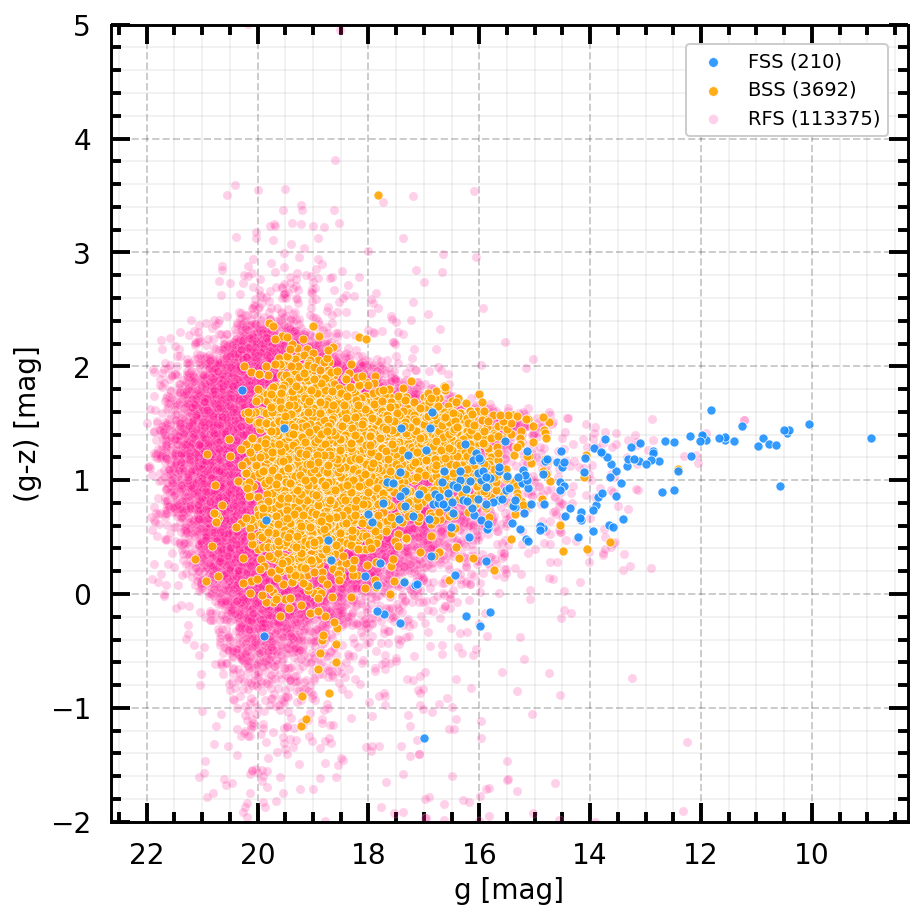

In [81]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )

x = 'G_auto'; y = 'G_auto-Z_auto'
ax0.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
             linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 4 )
ax0.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
             linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 3 )
ax0.scatter ( x, y, data = datos[datos['label'] == "Splus" ], s = size*2.2, alpha = 0.2, edgecolors = 'white', color = 'deeppink', marker = '.', 
             linewidth = 0.4, label = 'RFS (%i)' % (len(Splus)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 2 )

for a in [ ax0 ]:
    a.set_ylim (-2, 5)
    custom_axes ( a )
    a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

ax0.invert_xaxis()
ax0.set_xlabel ( "g [mag]" )
ax0.set_ylabel ( "(g-z) [mag]" )
    
for a in [ ax0 ]:
    handles, labels = a.get_legend_handles_labels()
    if (a == ax0):
        loc = 'upper right'

    lgd = a.legend ( handles, labels, framealpha = 1, loc = loc, ncol = 1, borderaxespad = 1. )
    for legend_handle in lgd.legendHandles:
        legend_handle.set_sizes([100])
    
plt.tight_layout()
plt.savefig ( "figures/Paper-CMR.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

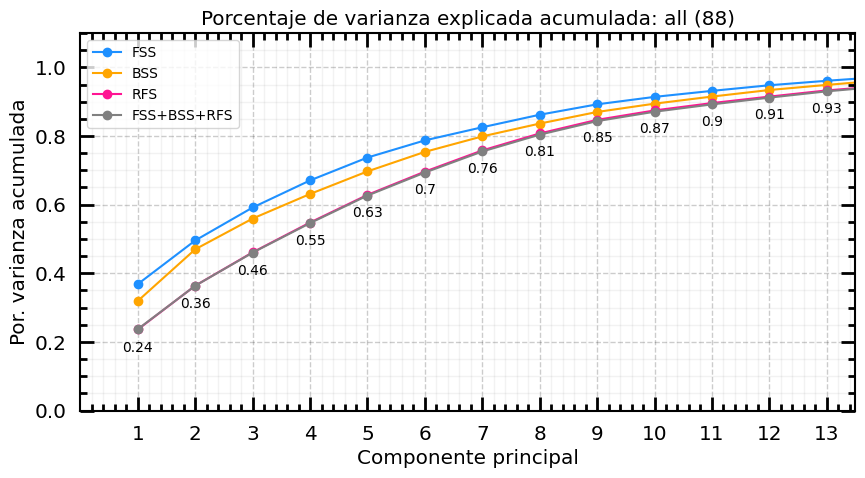

In [38]:
features = [ x for x in datos if ((x != 'label') & (x != 'ID') & (x != 'RA') & (x != 'DEC') & (x != 'z')& (x != 'CLASS_STAR_G')) ] # Les saco las columnas no numericas

prop_varianza_acum = [ ] 
prop_varianza_ratio = [ ] 
prop_components = [ ] 

for l_train in [ 'Fornax', 'Background', 'Splus', 'Fornax+Background+Splus' ]:
    if l_train == 'Fornax+Background+Splus':
        data = datos [ (datos['label'] == 'Fornax') | (datos['label'] == 'Background') | (datos['label'] == 'Splus') ][features]
    else:
        data = datos [ datos['label'] == l_train ][features]

    # Entrenamiento modelo PCA con escalado de los datos
    # ==============================================================================
    pca_pipe = make_pipeline(StandardScaler(), PCA())
    #pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=3)) # Se pueden definir la cant de componentes a calcular.
    pca_pipe.fit(data)

    # Se extrae el modelo entrenado del pipeline
    modelo_pca = pca_pipe.named_steps['pca']

    # Porcentaje de varianza explicada acumulada
    # ==============================================================================
    prop_varianza_acum.append ( modelo_pca.explained_variance_ratio_.cumsum() )
    prop_varianza_ratio.append ( modelo_pca.explained_variance_ratio_ )
    prop_components.append ( modelo_pca.components_ )

n_com = modelo_pca.n_components_
fig, ax = plt.subplots ( nrows = 1, ncols = 1, figsize = (10, 5), dpi = 100 )

for i, (l, c) in enumerate(zip([ 'FSS', 'BSS', 'RFS', 'FSS+BSS+RFS' ],  [ 'dodgerblue', 'orange', 'deeppink', 'gray' ])):
    ax.plot(
        np.arange(n_com) + 1,
        prop_varianza_acum[i],
        marker = 'o',
        color = c,
        label = l
    )

for x, y in zip(np.arange(n_com) + 1, prop_varianza_acum[2]):
    labelp = round(y, 2)
    ax.annotate(
        labelp,
        (x,y),
        textcoords = "offset points",
        xytext = (0,-16),
        ha = 'center'
    )

ax.minorticks_on()
ax.grid ( b = True, which = 'major', color = 'black', linestyle = '--', alpha = 0.3, zorder = 0.0 )
ax.grid ( b = True, which = 'minor', color = 'gray', linestyle = '-', alpha = 0.3, zorder = 0.0 )
ax.tick_params ( axis = "y", direction = "inout" )
ax.tick_params ( axis = "x", direction = "inout" )

custom_axes ( ax )
n_com = 13
ax.set_ylim(0, 1.1)
ax.set_xlim(0, n_com + 0.5)
#ax.set_xticks(np.arange(9) + 1.0)  
ax.set_xticks(np.arange(n_com) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada: all (%s)' %(modelo_pca.n_components_))
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
ax.legend()
plt.savefig ( "figures/PCA-all-01.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

n_com = modelo_pca.n_components_

In [39]:
var_exp = pd.DataFrame()
#
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
for i, l in enumerate([ 'Fornax', 'Background', 'Splus', 'Fornax+Background+Splus' ]):
    var_exp.loc[:, l] = pd.Series( prop_varianza_ratio[i], name = l, index = [ "PC" + str(j+1) for j in range(len(prop_varianza_ratio[i])) ] )

def xy_labels(train):
    return [ "%s (%.1f%%)" %(com, var) for com, var in zip(var_exp.index, var_exp[train] * 100) ]

var_exp

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------


Fornax    Background         Splus  Fornax+Background+Splus
PC1   3.685279e-01  3.195109e-01  2.363073e-01             2.373084e-01
PC2   1.271661e-01  1.504525e-01  1.276004e-01             1.264119e-01
PC3   9.599992e-02  8.957301e-02  9.720094e-02             9.646657e-02
PC4   7.895635e-02  7.156532e-02  8.685427e-02             8.600781e-02
PC5   6.663084e-02  6.582650e-02  8.058084e-02             8.033891e-02
...            ...           ...           ...                      ...
PC84  1.553584e-33  1.734392e-33  1.116948e-33             1.447090e-33
PC85  1.553584e-33  1.734392e-33  1.116948e-33             1.447090e-33
PC86  1.553584e-33  1.734392e-33  1.116948e-33             1.447090e-33
PC87  1.553584e-33  1.734392e-33  1.116948e-33             1.447090e-33
PC88  5.791290e-34  6.815761e-34  1.035891e-33             1.447090e-33

[88 rows x 4 columns]

In [40]:
coeff_tmp= pd.DataFrame()

for i, l in enumerate([ 'Fornax', 'Background', 'Splus', 'Fornax+Background+Splus' ]):
    print (l)
    # Se combierte el array a dataframe para añadir nombres a los ejes.
    coeff = pd.DataFrame ( data = prop_components[i].T, columns = [ "PC" + str(j+1) + " (" + l + " trained)" for j in range(len(prop_components[i])) ], index = features )

    coeff = pd.concat ( [coeff_tmp, coeff.set_index(coeff.index)],  axis = 1 )
    coeff_tmp = coeff.copy()

Fornax
Background
Splus
Fornax+Background+Splus


In [41]:
components_tmp = pd.DataFrame()
proyecciones = datos.copy()

for l_train in [ 'Fornax', 'Background', 'Splus', 'Fornax+Background+Splus' ]:
    if l_train == 'Fornax+Background+Splus':
        train = datos [ (datos['label'] == 'Fornax') | (datos['label'] == 'Background') | (datos['label'] == 'Splus') ][features]
    else:
        train = datos [ datos['label'] == l_train ][features]

    # Entrenamiento modelo PCA con escalado de los datos
    # ==============================================================================
    pca_pipe = make_pipeline(StandardScaler(), PCA())
    pca_pipe.fit ( train )

    # Se extrae el modelo entrenado del pipeline
    modelo_pca = pca_pipe.named_steps['pca']

    #
    components = pca_pipe.transform ( datos[features] )
    components_tmp = pd.DataFrame ( components, columns = [ "PC" + str(j+1) + " (" + l_train + " trained)" for j in range(len(components[0,:])) ] )
    proyecciones = pd.concat ( [proyecciones, components_tmp.set_index(proyecciones.index)],  axis = 1 )
#proyecciones

In [42]:
proyecciones[[ "PC" + str(j+1) + " (Fornax+Background+Splus trained)" for j in range(len(components[0,:])) ]]

PC1 (Fornax+Background+Splus trained)  \
0                                    7.185113   
1                                    2.662719   
2                                    2.982879   
3                                   -0.612583   
7                                    6.059083   
...                                       ...   
117272                               1.089035   
117273                              -0.601164   
117274                               3.954994   
117275                               4.536669   
117276                               6.517871   

        PC2 (Fornax+Background+Splus trained)  \
0                                   -5.313162   
1                                   -5.401724   
2                                   -4.699748   
3                                   -7.875396   
7                                   -2.646443   
...                                       ...   
117272                               9.358023   
117273                               7.103205   
117274                               5.350529   
117275                              13.330018   
117276                               4.888250   

        PC3 (Fornax+Background+Splus trained)  \
0                                   -3.423329   
1                                    4.841762   
2                                   -5.470708   
3                                    5.275963   
7                                   -2.764031   
...                                       ...   
117272                               0.032318   
117273                               0.844443   
117274                               0.473702   
117275                               1.912866   
117276                              -1.668982   

        PC4 (Fornax+Background+Splus trained)  \
0                                    0.367433   
1                                   -4.500039   
2                                    0.797112   
3                                    5.070950   
7                                   -2.648045   
...                                       ...   
117272                               0.038722   
117273                              -0.093704   
117274                               0.364558   
117275                              -0.196125   
117276                              -1.595326   

        PC5 (Fornax+Background+Splus trained)  \
0                                   -4.509860   
1                                   -1.186956   
2                                   -2.567764   
3                                    8.663796   
7                                   -4.661285   
...                                       ...   
117272                              -0.038328   
117273                               0.249536   
117274                               0.545154   
117275                               1.221578   
117276                              -0.794203   

        PC6 (Fornax+Background+Splus trained)  \
0                                   -4.121166   
1                                   -0.061199   
2                                   -3.284118   
3                                   -1.501791   
7                                   -1.184729   
...                                       ...   
117272                               0.572971   
117273                              -1.283280   
117274                              -0.005455   
117275                               1.011406   
117276                              -1.631448   

        PC7 (Fornax+Background+Splus trained)  \
0                                   -3.655771   
1                                   -2.169166   
2                                   10.187268   
3                                    3.885324   
7                                    7.533488   
...                                       ...   
117272                              -0.486452   
117273                              -0.204450   
117274                           

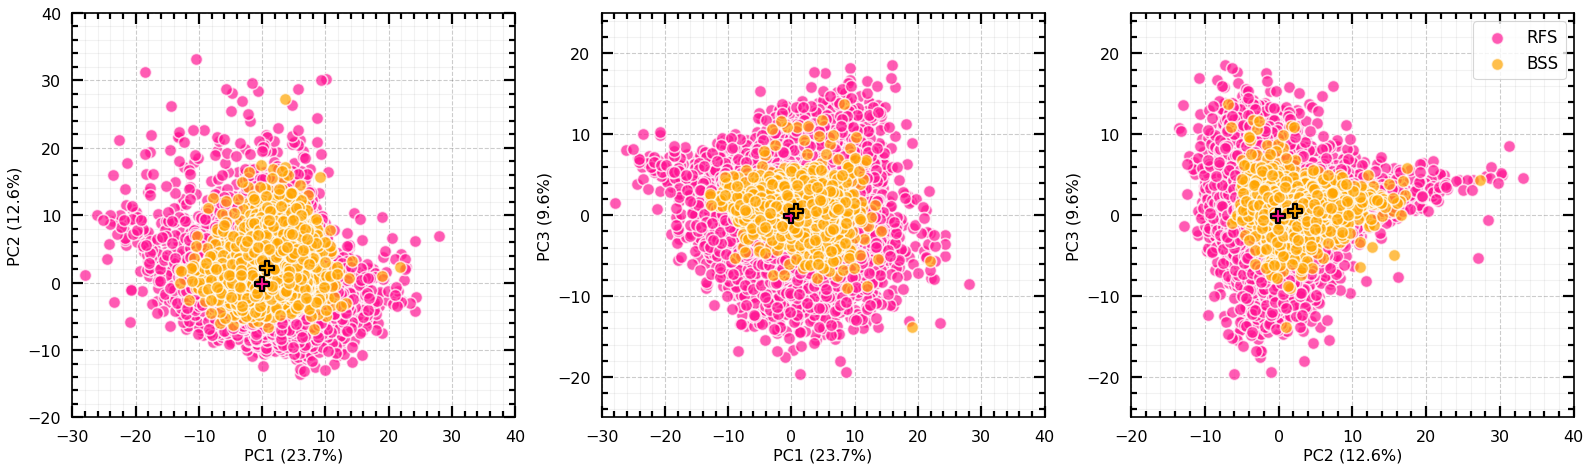

In [103]:
size = 150 # Tamaño por defecto para las fuentes de los graficos
fig, ( (ax0, ax1, ax2) ) = plt.subplots ( ncols = 3, nrows = 1, figsize = (20, 6), dpi = 80 )

l_train = 'Fornax+Background+Splus'; PC1min = -30; PC1max = 40;  PC2min = -20; PC2max = 40;  PC3min = -25; PC3max = 25
for PC in zip( [['PC1', 'PC2'], ['PC1', 'PC3'], ['PC2', 'PC3']], [[0, 1], [ 0, 2], [ 1, 2]], [[ ax0 ], [ ax1 ], [ ax2 ]], [[PC1min, PC1max, PC2min, PC2max], [PC1min, PC1max, PC3min, PC3max], [PC2min, PC2max, PC3min, PC3max]] ):
    a = PC[2][0]; x = PC[0][0] + ' (' + l_train + ' trained)'; y = PC[0][1] + ' (' + l_train + ' trained)'
    a.set_xlim ( PC[3][0], PC[3][1] ); a.set_ylim ( PC[3][2], PC[3][3] )  
    
#    for c, label, color in zip([ 'Splus', 'Background','Fornax' ], [ 'RFS', 'BSS', 'FSS' ], [ 'deeppink', 'orange', 'dodgerblue' ]):
#    for c, label, color in zip([ 'Splus', 'Fornax' ], [ 'RFS', 'FSS' ], [ 'deeppink', 'dodgerblue' ]):
    for c, label, color in zip([ 'Splus', 'Background' ], [ 'RFS', 'BSS' ], [ 'deeppink', 'orange' ]):
#    for c, label, color in zip([ 'Background','Fornax' ], [ 'BSS', 'FSS' ], [ 'orange', 'dodgerblue' ]):
        df = proyecciones[ proyecciones['label'] == c ]; 
        a.scatter ( x, y, data = df, label = label, s = size*0.8, alpha = 0.7, edgecolors = 'white', color = color, marker = 'o', linewidth = 1.5, zorder = 2 )
        a.scatter ( df[x].mean() , df[y].mean(), #label = "C$_{\mathrm{%s}}$" %(label), 
                   s = size*1.0, alpha = 1.0, edgecolors = 'black', color = color, marker = 'P', linewidth = 2, zorder = 3 )
    #biplot ( coeff, x, y, features, scale = 30, arrow_size = 0.11, linewidth = 4, ax = a )
    
    custom_axes ( a )
    a.set_xlabel ( xy_labels(l_train)[PC[1][0]] )
    a.set_ylabel ( xy_labels(l_train)[PC[1][1]] )
    if a == ax2: a.legend ( loc = 'upper right', fontsize = 15 )
    #a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

plt.tight_layout()
plt.savefig ( "figures/PCA-all-SPLUS-BACKGROUND_trained.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

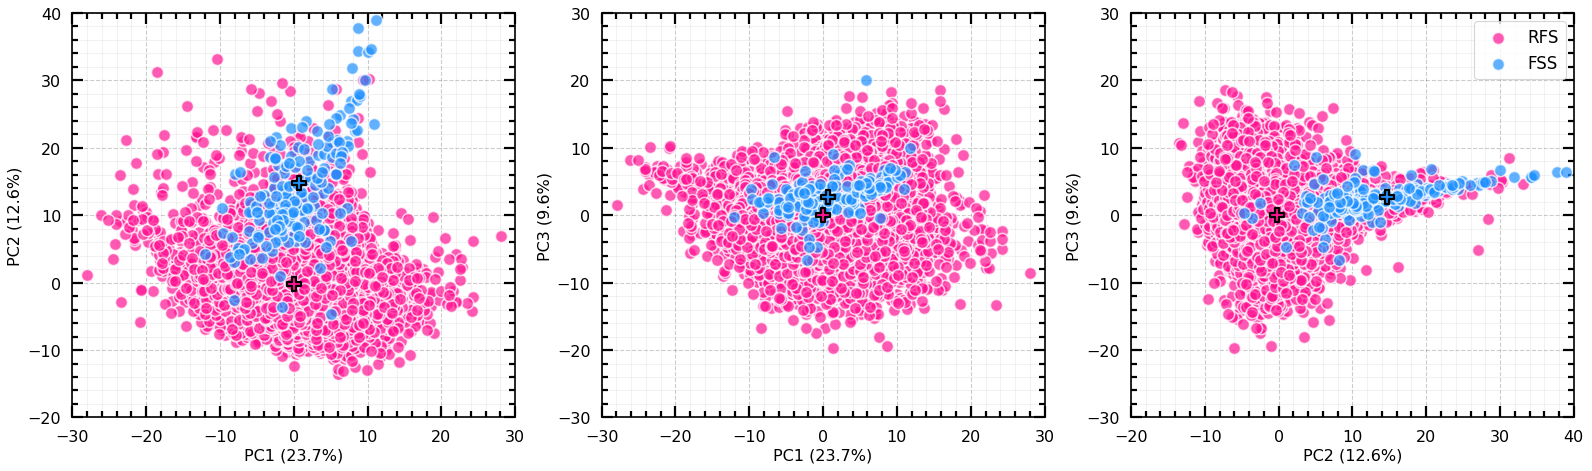

In [104]:
size = 150 # Tamaño por defecto para las fuentes de los graficos
fig, ( (ax0, ax1, ax2) ) = plt.subplots ( ncols = 3, nrows = 1, figsize = (20, 6), dpi = 80 )

l_train = 'Fornax+Background+Splus';  PC1min = -30; PC1max = 30;  PC2min = -20; PC2max = 40;  PC3min = -30; PC3max = 30
for PC in zip( [['PC1', 'PC2'], ['PC1', 'PC3'], ['PC2', 'PC3']], [[0, 1], [ 0, 2], [ 1, 2]], [[ ax0 ], [ ax1 ], [ ax2 ]], [[PC1min, PC1max, PC2min, PC2max], [PC1min, PC1max, PC3min, PC3max], [PC2min, PC2max, PC3min, PC3max]] ):
    a = PC[2][0]; x = PC[0][0] + ' (' + l_train + ' trained)'; y = PC[0][1] + ' (' + l_train + ' trained)'
    a.set_xlim ( PC[3][0], PC[3][1] ); a.set_ylim ( PC[3][2], PC[3][3] )  
    
#    for c, label, color in zip([ 'Splus', 'Background','Fornax' ], [ 'RFS', 'BSS', 'FSS' ], [ 'deeppink', 'orange', 'dodgerblue' ]):
    for c, label, color in zip([ 'Splus', 'Fornax' ], [ 'RFS', 'FSS' ], [ 'deeppink', 'dodgerblue' ]):
#    for c, label, color in zip([ 'Background','Fornax' ], [ 'BSS', 'FSS' ], [ 'orange', 'dodgerblue' ]):
        df = proyecciones[ proyecciones['label'] == c ]; 
        a.scatter ( x, y, data = df, label = label, s = size*0.8, alpha = 0.7, edgecolors = 'white', color = color, marker = 'o', linewidth = 1.5, zorder = 2 )
        a.scatter ( df[x].mean() , df[y].mean(), #label = "C$_{\mathrm{%s}}$" %(label), 
                   s = size*1.0, alpha = 1.0, edgecolors = 'black', color = color, marker = 'P', linewidth = 2, zorder = 3 )
    #biplot ( coeff, x, y, features, scale = 30, arrow_size = 0.11, linewidth = 4, ax = a )
    
    custom_axes ( a )
    a.set_xlabel ( xy_labels(l_train)[PC[1][0]] )
    a.set_ylabel ( xy_labels(l_train)[PC[1][1]] )
    if a == ax2: a.legend ( loc = 'upper right', fontsize = 15 )
    #a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

plt.tight_layout()
plt.savefig ( "figures/PCA-all-SPLUS-Fornax_trained.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

## Calcula la distancia al valor medio de cada nube de datos

In [45]:
i = 0; l = 'Fornax'
Fornax_proyecciones = proyecciones[ proyecciones['label'] == l ]
#for c_train in [ 'Fornax+Background+Splus' ]:
#    s2 = Fornax_proyecciones [[ "PC" + str(j+1) + " (" + c_train + " trained)" for j in range(len(prop_components[i])) ]].mean().squeeze() 
#    Fornax_proyecciones['Distance ' + c_train + ' center'] = [ np.linalg.norm(Fornax_proyecciones [[ "PC" + str(j+1) + " (" + c_train + " trained)" for j in range(len(prop_components[i])) ]].T[h].squeeze().values-s2.values) for h in Fornax_proyecciones.T.columns ]

##
i = 1; l = 'Background'
Background_proyecciones = proyecciones[ proyecciones['label'] == l ]
#for c_train in [ 'Fornax+Background+Splus' ]:
#    s2 = Background_proyecciones [[ "PC" + str(j+1) + " (" + c_train + " trained)" for j in range(len(prop_components[i])) ]].mean().squeeze() 
#    Background_proyecciones['Distance ' + c_train + ' center'] = [ np.linalg.norm(Background_proyecciones [[ "PC" + str(j+1) + " (" + c_train + " trained)" for j in range(len(prop_components[i])) ]].T[h].squeeze().values-s2.values) for h in Background_proyecciones.T.columns ]
    
##
i = 2; l = 'Splus'
Splus_proyecciones = proyecciones[ proyecciones['label'] == l ]
c_train = 'Fornax+Background+Splus'
for l_train in [ 'Fornax', 'Background' ]:
    df = proyecciones[ proyecciones['label'] == l_train ]
    s2 = df [[ "PC" + str(j+1) + " (" + c_train + " trained)" for j in range(len(prop_components[i])) ]].mean().squeeze() 
    Splus_proyecciones['Distance ' + l_train + ' center'] = [ np.linalg.norm(Splus_proyecciones [[ "PC" + str(j+1) + " (" + c_train + " trained)" for j in range(len(prop_components[i])) ]].T[h].squeeze().values-s2.values) for h in Splus_proyecciones.T.columns ]

Splus_proyecciones['Distance total'] = Splus_proyecciones['Distance Background center'] + Splus_proyecciones['Distance Fornax center']
Splus_proyecciones['Distance Background center percent'] = Splus_proyecciones['Distance Background center']/Splus_proyecciones['Distance total']
Splus_proyecciones['Distance Fornax center percent'] = Splus_proyecciones['Distance Fornax center']/Splus_proyecciones['Distance total']

In [46]:
Splus_proyecciones#['label'] # [[ "PC" + str(j+1) + " (" + c_train + " trained)" for j in range(len(prop_components[i])) ]]

ID         RA        DEC  \
0       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.00838'  41.650450 -30.290130   
1       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.00870'  41.652419 -30.217760   
2       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.01417'  41.681696 -31.291301   
3       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.01685'  41.696469 -30.998878   
7       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.03603'  41.809607 -31.115926   
...                                        ...        ...        ...   
113277  b'iDR4_FORNAX_RUN2_SPLUS-s32s33.12569'  58.038060 -42.088525   
113296  b'iDR4_FORNAX_RUN2_SPLUS-s32s33.12892'  58.079472 -42.068244   
113311  b'iDR4_FORNAX_RUN2_SPLUS-s32s33.13065'  58.101329 -42.095107   
113327  b'iDR4_FORNAX_RUN2_SPLUS-s32s33.13252'  58.127350 -41.381572   
113358  b'iDR4_FORNAX_RUN2_SPLUS-s32s33.13714'  58.190072 -42.111577   

        R_t_G [arcsec]  R_e_G [arcsec]   <mu_e_G>   A_IMAGE   B_IMAGE  \
0             2.092938        1.380225  23.485165  2.576553  1.844335   
1             2.987483        1.807772  23.671715  2.016001  1.578978   
2             3.008652        1.179790  23.314354  1.547233  1.318853   
3             2.453251        1.103169  23.168636  1.539985  1.360538   
7             2.851008        1.134815  22.639345  1.653363  1.469827   
...                ...             ...        ...       ...       ...   
113277        4.452513        1.874632  23.204056  2.466468  2.195805   
113296        8.747645        3.470337  23.556662  4.297625  2.241710   
113311        6.568694        3.114269  22.732697  4.230775  3.640914   
113327        1.810929        1.018733  22.130011  2.196886  2.018294   
113358        7.030385        3.148716  24.047716  2.657812  2.119313   

        ELONGATION  ELLIPTICITY  ...  PC84 (Fornax+Background+Splus trained)  \
0         1.397009     0.284185  ...                            5.461336e-17   
1         1.276776     0.216777  ...                            6.939520e-16   
2         1.173166     0.147605  ...                           -1.802752e-15   
3         1.131894     0.116525  ...                           -1.459850e-15   
7         1.124869     0.111008  ...                           -1.018944e-15   
...            ...          ...  ...                                     ...   
113277    1.123264     0.109737  ...                           -5.882417e-16   
113296    1.917119     0.478384  ...                           -6.264065e-16   
113311    1.162009     0.139421  ...                           -7.062850e-16   
113327    1.088486     0.081293  ...                            2.763314e-17   
113358    1.254091     0.202610  ...                           -4.931790e-16   

        PC85 (Fornax+Background+Splus trained)  \
0                                -1.440934e-15   
1                                -5.347862e-16   
2                                -4.940440e-16   
3                                 1.935670e-15   
7                                -4.397650e-16   
...                                        ...   
113277                            1.748496e-16   
113296                            4.935377e-16   
113311                            6.981206e-16   
113327                           -4.115862e-16   
113358                            1.448923e-15   

        PC86 (Fornax+Background+Splus trained)  \
0                                 3.083985e-16   
1                                 5.584398e-16   
2                                 2.482881e-16   
3                                 1.501088e-15   
7                                 3.867458e-17   
...                                        ...   
113277                           -4.161867e-16   
113296                           -5.504844e-16   
113311                           -3.895598e-16   
113327                           -1.254329e-16   
113358                           -1.457575e-16   

        PC87 (Fornax+Background+Splus trained)  \
0                                 2.324086e-16   
1                                 3.157

## histograma de esto para ver si los cortes 0.4 -0.5, 0.5-0.6, 0.6- estan bien.


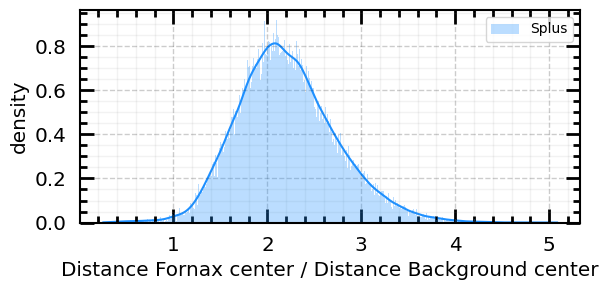

In [153]:
#col = Splus_proyecciones['Distance Fornax center percent'] 
col = Splus_proyecciones['Distance Fornax center'] / Splus_proyecciones['Distance Background center'] 

label = "Distance Fornax center / Distance Background center"
Nbins = 0.05/10
output = "figures/Paper-HIST-DistancePercent.jpg"

crea_histograma ( col, label, Nbins , output)#, lim = lim )
frq, edges, den = calcula_histograma ( col, Nbins )
den

In [48]:
def calcula_histograma ( data, Nbins, lim = 'None', density = True ):
    if lim == 'None':
        vmin = data.min(); vmax = data.max()
    else:
        vmin = lim[0]; vmax = lim[1]
        
    bins = np.arange ( vmin, vmax, Nbins )
    frq, edges = np.histogram ( data, bins, density = density )
    den = stats.kde.gaussian_kde ( data )
    return frq, edges, den

def crea_histograma ( col, xlabel, Nbins, output, lim = 'None' ):
    fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (6, 3), dpi = 100 ) 

    kwargs = dict ( alpha = 0.3, edgecolor = None )
    #for tabla, label, color in zip([ Fornax, Background, Splus ], [ 'FSS', 'BSS', 'RFS' ], [ 'dodgerblue', 'orange', 'deeppink' ]):
    data = col #tabla [col]

    frq, edges, den = calcula_histograma ( data, Nbins, lim = lim, density = True )
    ax0.bar ( edges[:-1], frq, width = Nbins, color = color, label = "Splus", zorder = 2, **kwargs )
    ax0.plot ( edges[:-1], den(edges[:-1]), color = color, zorder = 1 )

    custom_axes ( ax0 )
    ax0.set_xlabel ( xlabel ); ax0.set_ylabel ( 'density' )
    #ax0.ticklabel_format ( axis = "y", style = "sci", scilimits = (-2,0) )
    #ax0.use_sticky_edges = False
    #ax0.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) % from matplotlib.ticker import FormatStrFormatter
    #ax0.set_xlim ( lim[0], lim[1] )
    
    plt.legend()
    plt.tight_layout ( rect = (0, 0, 1, 1) )
    plt.savefig ( output, dpi = 550, facecolor = 'w', edgecolor = 'w',
                  orientation = 'portrait', format = None, transparent = False, 
                  bbox_inches = 'tight', pad_inches = 0.01 )
    plt.show()
    plt.close(fig)

In [141]:
dd = Splus_proyecciones['Distance Fornax center percent'] / Splus_proyecciones['Distance Background center percent'] 
dd.describe()

count    66659.000000
mean         2.210768
std          0.528657
min          0.254060
25%          1.850346
50%          2.169456
75%          2.530300
max          5.092862
dtype: float64

## Diferencia entre los centros medio de los datos de Fornax y Splus, proyectados sobre Fornax

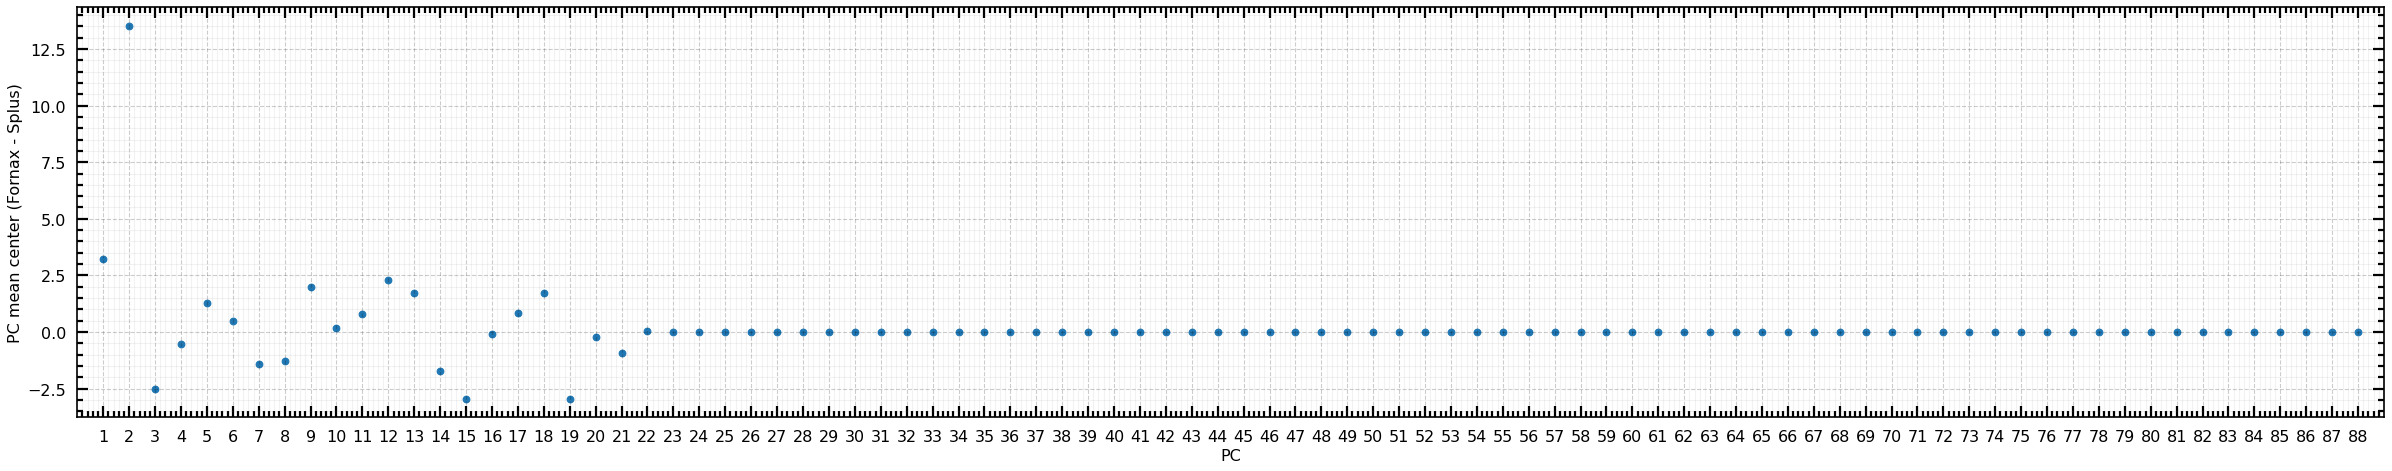

In [43]:
size = 150 # Tamaño por defecto para las fuentes de los graficos
fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (30, 6), dpi = 80 )

s1 = Fornax_proyecciones [[ "PC" + str(j+1) + " (Fornax+Background+Splus trained)" for j in range(modelo_pca.n_components_) ]].mean() 
s2 = Splus_proyecciones [[ "PC" + str(j+1) + " (Fornax+Background+Splus trained)" for j in range(modelo_pca.n_components_) ]].mean() 

ax0.scatter ( s1.index, (s1.values - s2.values) )
ax0.set_xlim(-1, 88)
ax0.set_xticks ( range(modelo_pca.n_components_), range(1, modelo_pca.n_components_+1)  )
custom_axes ( ax0 )

ax0.set_xlabel ( "PC" )
ax0.set_ylabel ( "PC mean center (Fornax - Splus)" )
    
plt.tight_layout()

plt.show()

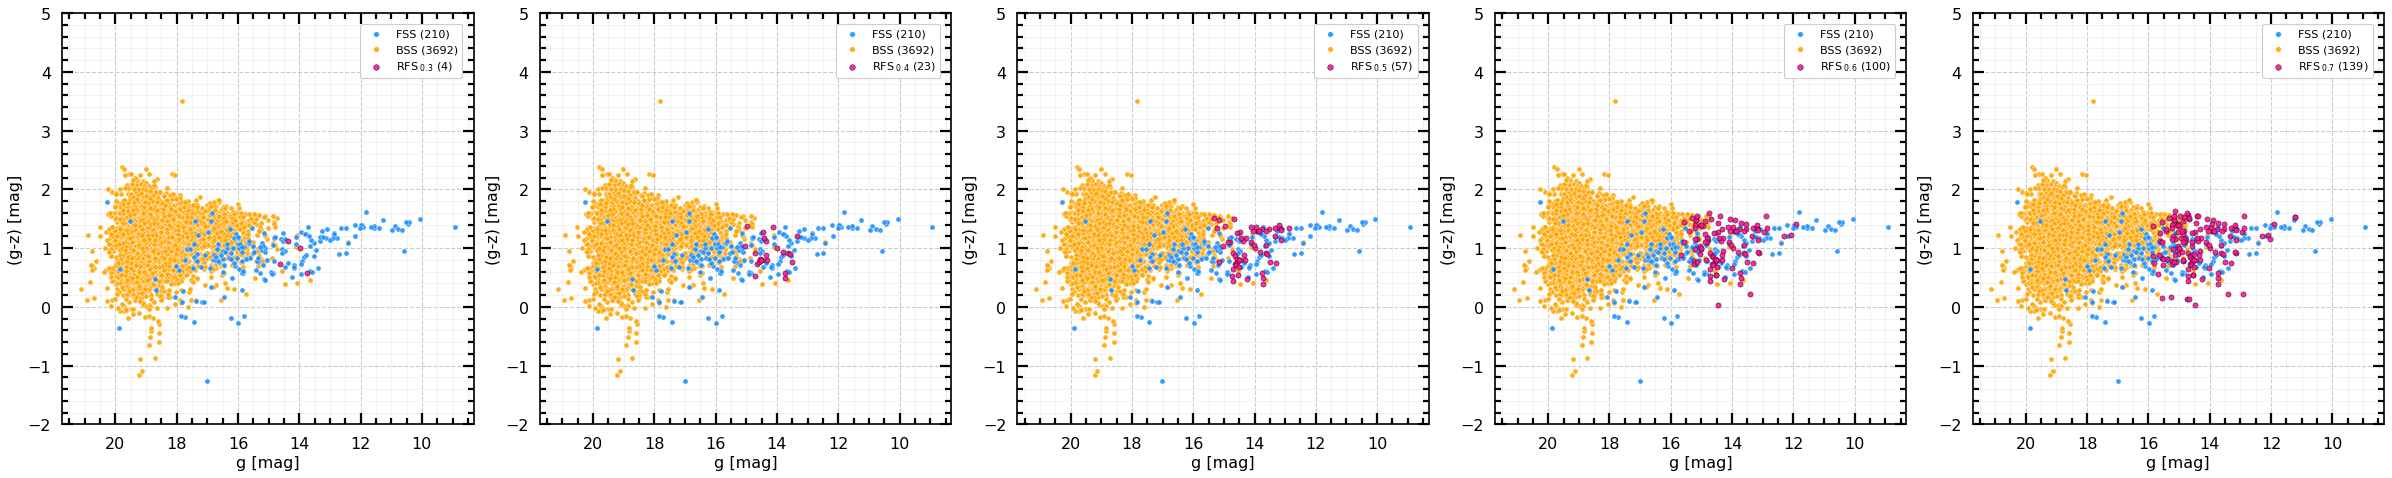

In [157]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
#fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )
fig, ( (ax0, ax1, ax2, ax3, ax4) ) = plt.subplots ( ncols = 5, nrows = 1, figsize = (10*3, 6*3), dpi = 80 )

x = 'G_auto'; y = 'G_auto-Z_auto'

for a, AA in zip([ ax0, ax1, ax2, ax3, ax4 ], [0.3, 0.4, 0.5, 0.6, 0.7]):
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )    
    cond = Splus_proyecciones['Distance Fornax center']/Splus_proyecciones['Distance Background center']
    d = Splus_proyecciones[ (cond < AA) ]
    a.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
                 linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (AA, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )

#d = Splus_proyecciones[Splus_proyecciones['Distance Fornax center percent'] > A]
#ax1.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
#             linewidth = 0.4, label = 'RFS$^{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
#             zorder = 4 )

for a in [ ax0, ax1, ax2, ax3, ax4 ]:
    a.set_ylim (-2, 5)
    custom_axes ( a )
    a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

    a.invert_xaxis()
    a.set_xlabel ( "g [mag]" )
    a.set_ylabel ( "(g-z) [mag]" )
    
for a in [ ax0, ax1, ax2, ax3, ax4 ]:
    handles, labels = a.get_legend_handles_labels()
    if (a == ax0):
        loc = 'upper right'

    lgd = a.legend ( handles, labels, framealpha = 1, loc = loc, ncol = 1, borderaxespad = 1. )
    for legend_handle in lgd.legendHandles:
        legend_handle.set_sizes([100])
    
plt.tight_layout()
plt.savefig ( "figures/Paper-CMR-DistancePercent2.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

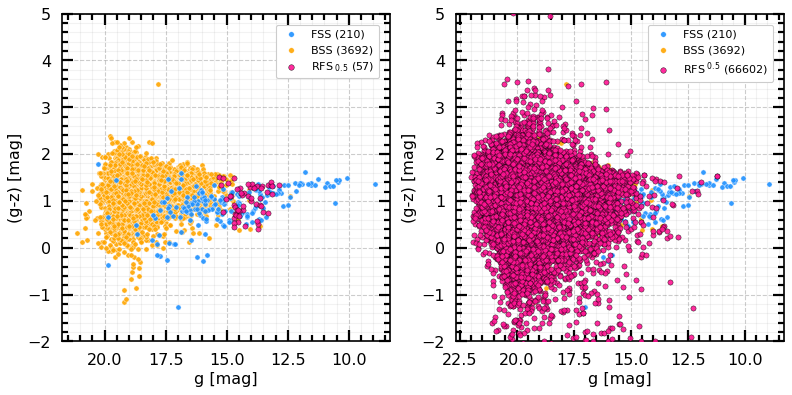

In [148]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
#fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )
fig, ( (ax0, ax1) ) = plt.subplots ( ncols = 2, nrows = 1, figsize = (10, 6), dpi = 80 )

x = 'G_auto'; y = 'G_auto-Z_auto'
for a in [ ax0, ax1 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
A = 0.5
#cond = Splus_proyecciones['Distance Fornax center percent']
cond = Splus_proyecciones['Distance Fornax center percent'] / Splus_proyecciones['Distance Background center percent'] 

d = Splus_proyecciones[ cond < A]
ax0.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
             linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 4 )
d = Splus_proyecciones[ cond > A]
ax1.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
             linewidth = 0.4, label = 'RFS$^{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 4 )

for a in [ ax0, ax1 ]:
    a.set_ylim (-2, 5)
    custom_axes ( a )
    a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

    a.invert_xaxis()
    a.set_xlabel ( "g [mag]" )
    a.set_ylabel ( "(g-z) [mag]" )
    
for a in [ ax0, ax1 ]:
    handles, labels = a.get_legend_handles_labels()
    if (a == ax0):
        loc = 'upper right'

    lgd = a.legend ( handles, labels, framealpha = 1, loc = loc, ncol = 1, borderaxespad = 1. )
    for legend_handle in lgd.legendHandles:
        legend_handle.set_sizes([100])
    
plt.tight_layout()
plt.savefig ( "figures/Paper-CMR-DistancePercent2.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

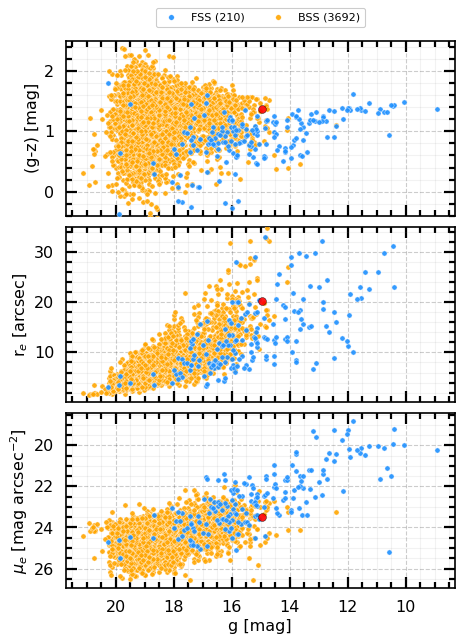

In [220]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
#fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )
fig, ( (ax0, ax1, ax2) ) = plt.subplots ( ncols = 1, nrows = 3, sharex=True, figsize = (6, 8), dpi = 80 )

A = 0.30
d = Splus_proyecciones[Splus_proyecciones['Distance Fornax center percent'] < A]

x = 'G_auto'; y = 'G_auto-Z_auto'
for a in [ ax0 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
    #a.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'red', marker = '.', 
    #             linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
    #             zorder = 4 )
    a.scatter ( x, y, data = Splus_proyecciones[Splus_proyecciones["ID"] == b'iDR4_FORNAX_RUN2_SPLUS-s30s35.03131'],s = size*5.0, alpha = 0.9,
               edgecolors = 'black', color = 'red', marker = '.', linewidth = 0.4, label = None, zorder = 4 )
    
    a.set_ylabel ( "(g-z) [mag]" )
    a.set_ylim (-0.4, 2.5)
    
x = 'G_auto'; y = 'R_e_G [arcsec]'
for a in [ ax1 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
    #a.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'red', marker = '.', 
    #             linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
    #             zorder = 4 )    
    a.scatter ( x, y, data = Splus_proyecciones[Splus_proyecciones["ID"] == b'iDR4_FORNAX_RUN2_SPLUS-s30s35.03131'],s = size*5.0, alpha = 0.9,       
               edgecolors = 'black', color = 'red', marker = '.', linewidth = 0.4, label = None, zorder = 4 )
    a.set_ylabel ( "r$_{e}$ [arcsec]" )
    a.set_ylim (0.1, 35)

x = 'G_auto'; y = '<mu_e_G>'
for a in [ ax2 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
    #a.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'red', marker = '.', 
    #             linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
    #             zorder = 4 )    
    a.scatter ( x, y, data = Splus_proyecciones[Splus_proyecciones["ID"] == b'iDR4_FORNAX_RUN2_SPLUS-s30s35.03131'],s = size*5.0, alpha = 0.9, 
               edgecolors = 'black', color = 'red', marker = '.', linewidth = 0.4, label = None, zorder = 4 )
    
    a.set_xlabel ( "g [mag]" )
    a.set_ylabel ( "$\mu_{e}$ [mag arcsec$^{-2}$]" )
    a.invert_yaxis()
    
for a in [ ax0, ax1, ax2 ]:
    #a.set_ylim (-2, 5)
    custom_axes ( a )
    a.set_aspect ( 0.45/a.get_data_ratio())#, adjustable = 'box' )

    a.invert_xaxis()
    #a.set_xlabel ( "g [mag]" )
    #a.set_ylabel ( "<$\mu_{e}$> [mag arcsec$^{-2}$]" )
    
for a in [ ax0 ]: #, ax1, ax2 ]:
    handles, labels = a.get_legend_handles_labels()
    loc = 'upper center'
    # legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
    #   ncol=2, mode="expand", borderaxespad=0.)

    lgd = a.legend ( handles, labels, framealpha = 1, bbox_to_anchor = (0.5, 1.25), 
                    loc = loc, ncol = 3, borderaxespad = 1. )
    for legend_handle in lgd.legendHandles:
        legend_handle.set_sizes([100])
    
#plt.tight_layout()
fig.tight_layout(pad=1.0)

plt.savefig ( "figures/Paper-CMR-DistancePercent.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

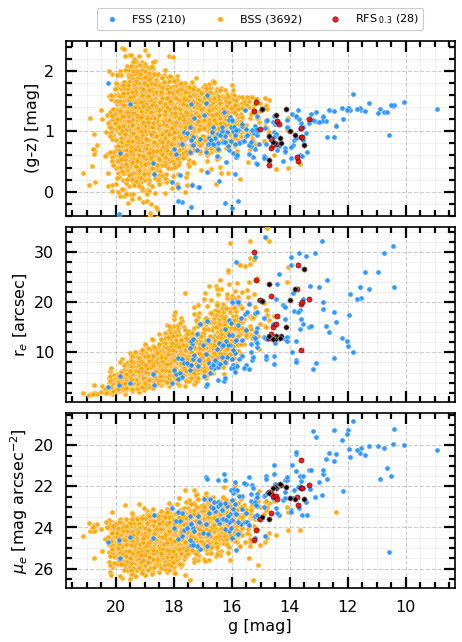

In [211]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
#fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )
fig, ( (ax0, ax1, ax2) ) = plt.subplots ( ncols = 1, nrows = 3, sharex=True, figsize = (6, 8), dpi = 80 )

A = 0.30
d = Splus_proyecciones[Splus_proyecciones['Distance Fornax center percent'] < A]

x = 'G_auto'; y = 'G_auto-Z_auto'
for a in [ ax0 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
    a.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'red', marker = '.', 
                 linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = Splus_proyecciones[Splus_proyecciones["ID"] == b'iDR4_FORNAX_RUN2_SPLUS-s30s35.03131'],s = size*2.2, alpha = 0.9,       edgecolors = 'black', color = 'black', marker = '.', 
                 linewidth = 0.4, label = None,
                 zorder = 4 )    
    
    for i in range(len(candidatas)):
        data = Splus_proyecciones[Splus_proyecciones['RA']==candidatas[i][0]]
        a.scatter ( x, y, data = data, s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'black', marker = '.', 
                     linewidth = 0.4, label = None, zorder = 4 )
    
    a.set_ylabel ( "(g-z) [mag]" )
    a.set_ylim (-0.4, 2.5)
    
x = 'G_auto'; y = 'R_e_G [arcsec]'
for a in [ ax1 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
    a.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'red', marker = '.', 
                 linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )    
    a.scatter ( x, y, data = Splus_proyecciones[Splus_proyecciones["ID"] == b'iDR4_FORNAX_RUN2_SPLUS-s30s35.03131'],s = size*2.2, alpha = 0.9,       edgecolors = 'black', color = 'black', marker = '.', 
                 linewidth = 0.4, label = None, 
                 zorder = 4 )    
    
    for i in range(len(candidatas)):
        data = Splus_proyecciones[Splus_proyecciones['RA']==candidatas[i][0]]
        a.scatter ( x, y, data = data, s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'black', marker = '.', 
                     linewidth = 0.4, label = None, zorder = 4 )
    
    a.set_ylabel ( "r$_{e}$ [arcsec]" )
    a.set_ylim (0.1, 35)

x = 'G_auto'; y = '<mu_e_G>'
for a in [ ax2 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
    a.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'red', marker = '.', 
                 linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )    
    
    for i in range(len(candidatas)):
        data = Splus_proyecciones[Splus_proyecciones['RA']==candidatas[i][0]]
        a.scatter ( x, y, data = data, s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'black', marker = '.', 
                     linewidth = 0.4, label = None, zorder = 4 )
    
    a.set_xlabel ( "g [mag]" )
    a.set_ylabel ( "$\mu_{e}$ [mag arcsec$^{-2}$]" )
    a.invert_yaxis()
    
for a in [ ax0, ax1, ax2 ]:
    #a.set_ylim (-2, 5)
    custom_axes ( a )
    a.set_aspect ( 0.45/a.get_data_ratio())#, adjustable = 'box' )

    a.invert_xaxis()
    #a.set_xlabel ( "g [mag]" )
    #a.set_ylabel ( "<$\mu_{e}$> [mag arcsec$^{-2}$]" )
    
for a in [ ax0 ]: #, ax1, ax2 ]:
    handles, labels = a.get_legend_handles_labels()
    loc = 'upper center'
    # legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
    #   ncol=2, mode="expand", borderaxespad=0.)

    lgd = a.legend ( handles, labels, framealpha = 1, bbox_to_anchor = (0.5, 1.25), 
                    loc = loc, ncol = 3, borderaxespad = 1. )
    for legend_handle in lgd.legendHandles:
        legend_handle.set_sizes([100])
    
#plt.tight_layout()
fig.tight_layout(pad=1.0)

plt.savefig ( "figures/Paper-CMR-DistancePercent.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

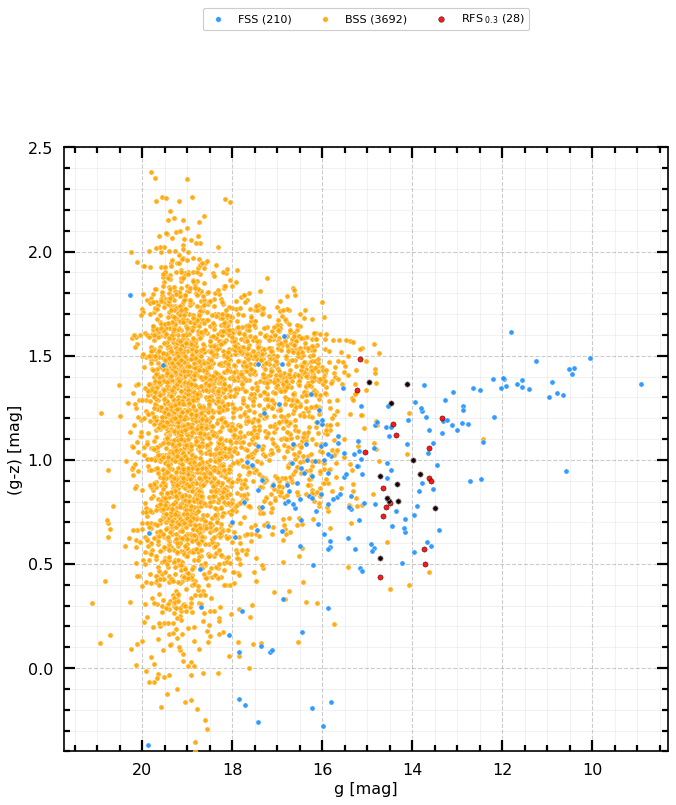

In [210]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
#fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )
fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10, 10), dpi = 80 )

A = 0.30
d = Splus_proyecciones[Splus_proyecciones['Distance Fornax center percent'] < A]

x = 'G_auto'; 
for y, ylabel, ylim in zip(['G_auto-Z_auto',  'R_e_G [arcsec]', '<mu_e_G>'], ['(g-z) [mag]', 'r$_{e}$ [arcsec]', "$\mu_{e}$ [mag arcsec$^{-2}$]"], [(-0.4, 2.5), (0.1, 35), (26, 20)]):
    ax0.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    ax0.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
    ax0.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'red', marker = '.', 
                 linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    
    for i in range(len(candidatas)):
        data = Splus_proyecciones[Splus_proyecciones['RA']==candidatas[i][0]]
        ax0.scatter ( x, y, data = data, s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'black', marker = '.', 
                     linewidth = 0.4, label = None, zorder = 4 )
    
    ax0.set_ylabel ( ylabel )
    ax0.set_ylim ( ylim )

    ax0.set_xlabel ( "g [mag]" )
    custom_axes ( ax0 )
    ax0.set_aspect ( 1/ax0.get_data_ratio())
    ax0.invert_xaxis()

    handles, labels = ax0.get_legend_handles_labels()
    loc = 'upper center'
    lgd = ax0.legend ( handles, labels, framealpha = 1, bbox_to_anchor = (0.5, 1.25), 
                    loc = loc, ncol = 3, borderaxespad = 1. )
    for legend_handle in lgd.legendHandles:
        legend_handle.set_sizes([100])
    plt.show()

#fig.tight_layout(pad=1.0)

#plt.savefig ( "figures/Paper-CMR-DistancePercent.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
#            orientation = 'portrait', format = None, transparent = False, 
#            bbox_inches = 'tight', pad_inches = 0.01 )
#plt.show()

In [192]:
for x, ylabel, xmin, x0 in zip(['G_auto-Z_auto',  'R_e_G [arcsec]', '<mu_e_G>'], ['(g-z) [mag]', 'r$_{e}$ [arcsec]', "$\mu_{e}$ [mag arcsec$^{-2}$]"], [(-0.4, 2.5), (0.1, 35), (26, 20)], [ax0, ax1, ax2]):
    print (x)

    a.set_ylabel ( "r$_{e}$ [arcsec]" )
    a.set_ylim (0.1, 35)

G_auto-Z_auto
R_e_G [arcsec]
<mu_e_G>


In [131]:
Splus_proyecciones[Splus_proyecciones["ID"] == b'iDR4_FORNAX_RUN2_SPLUS-s30s35.03131']

ID         RA        DEC  \
97270  b'iDR4_FORNAX_RUN2_SPLUS-s30s35.03131'  58.002403 -39.047814   

       R_t_G [arcsec]  R_e_G [arcsec]   <mu_e_G>    A_IMAGE    B_IMAGE  \
97270       47.695206       20.337709  23.497002  21.359238  15.494442   

       ELONGATION  ELLIPTICITY  ...  PC84 (Fornax+Background+Splus trained)  \
97270     1.37851     0.274579  ...                           -3.370430e-18   

       PC85 (Fornax+Background+Splus trained)  \
97270                           -9.128656e-17   

       PC86 (Fornax+Background+Splus trained)  \
97270                            2.179450e-16   

       PC87 (Fornax+Background+Splus trained)  \
97270                           -1.024060e-15   

       PC88 (Fornax+Background+Splus trained)  Distance Fornax center  \
97270                            1.229179e-15                 4.66328   

       Distance Background center  Distance total  \
97270                   15.157991       19.821271   

       Distance Background center percent  Distance Fornax center percent  
97270                            0.764734                        0.235266  

[1 rows x 450 columns]

In [172]:
#Splus_proyecciones[Splus_proyecciones['Distance Fornax center percent'] < 0.3][['ID', 'RA','DEC']].sort_values('RA')
candidatas = [
(44.35434327139243,-35.569532665093426),                                    
(46.66849811249481,-32.86361396958464),                                         
(46.80457637633826,-31.40030575507144),                                          
(46.80462307592536,-31.40148787526145),                                          
(47.491740312623435,-31.13982660862205),                                          
(48.20257640447568,-31.48632095953088),                                         
(53.5702689565186,-30.732818805364225),                                          
(53.57057984515796,-30.732388123589),                                          
(54.177274523689654,-30.735235334387767),                                          
(58.00240253327538,-39.047813538411255),                                        
(64.2940631210736,-39.465716461922554),                                         
(64.29411401917574,-39.465703413663796)    
]

In [182]:
for i in range(len(candidatas)):
    print ( Splus_proyecciones[Splus_proyecciones['RA']==candidatas[i][0]], candidatas[i][0]  )

[44.35434327] 44.35434327139243
[46.66849811] 46.66849811249481
[46.80457638] 46.80457637633826
[46.80462308] 46.80462307592536
[47.49174031] 47.491740312623435
[48.2025764] 48.20257640447568
[53.57026896] 53.5702689565186
[53.57057985] 53.57057984515796
[54.17727452] 54.177274523689654
[58.00240253] 58.00240253327538
[64.29406312] 64.2940631210736
[64.29411402] 64.29411401917574


In [170]:
A = 0.4
cond = Splus_proyecciones['Distance Fornax center'] / Splus_proyecciones['Distance Background center'] 

Splus_proyecciones[cond < 0.3][['RA','DEC']].to_csv('tablas/candidatas-0.3_FB.csv', index = False)
Splus_proyecciones[cond < 0.4][['RA','DEC']].to_csv('tablas/candidatas-0.4_FB.csv', index = False)

Splus_proyecciones[['RA','DEC', 'cond']].to_csv('tablas/candidatas_FB.csv', index = False)


In [171]:
A = 0.4
cond = Splus_proyecciones['Distance Fornax center'] / Splus_proyecciones['Distance Background center'] 
Splus_proyecciones['cond'] = Splus_proyecciones['Distance Fornax center'] / Splus_proyecciones['Distance Background center'] 

d = Splus_proyecciones[ cond < A]
d[['RA','DEC', 'cond']].sort_values('cond')

RA        DEC      cond
11649   53.570269 -30.732819  0.254060
1776    51.819186 -33.485756  0.278532
45013   55.689674 -33.920262  0.279487
69709   51.335599 -36.386706  0.297135
97270   58.002403 -39.047814  0.307645
7985    47.491740 -31.139827  0.318381
109218  64.294063 -39.465716  0.322968
100293  64.294114 -39.465703  0.328188
70627   53.622817 -35.546505  0.333197
2837    63.289551 -34.425898  0.334502
145     46.804576 -31.400306  0.346007
2482    49.221781 -35.541147  0.352053
11852   54.177275 -30.735235  0.358748
66242   44.354343 -35.569533  0.362337
310     53.570580 -30.732388  0.365575
64814   63.290008 -34.425944  0.366870
8388    48.202576 -31.486321  0.380555
69703   51.320544 -36.375855  0.383916
28108   51.509356 -32.894664  0.386579
24950   46.668498 -32.863614  0.386658
3861    58.572254 -36.971112  0.390646
7523    46.804623 -31.401488  0.392226
85824   58.573387 -36.970821  0.396690

In [46]:
candidates.columns.values

array(['ID', 'RA', 'DEC', 'R_t_G [arcsec]', 'R_e_G [arcsec]', '<mu_e_G>',
       'A_IMAGE', 'B_IMAGE', 'ELONGATION', 'ELLIPTICITY', 'CLASS_STAR_G',
       'THETA_IMAGE2', 'D_NGC1316 [arcsec]', 'D_NGC1399 [arcsec]',
       'U_auto-F378_auto', 'U_auto-F395_auto', 'U_auto-F410_auto',
       'U_auto-F430_auto', 'U_auto-G_auto', 'U_auto-F515_auto',
       'U_auto-R_auto', 'U_auto-F660_auto', 'U_auto-I_auto',
       'U_auto-F861_auto', 'U_auto-Z_auto', 'F378_auto-F395_auto',
       'F378_auto-F410_auto', 'F378_auto-F430_auto', 'F378_auto-G_auto',
       'F378_auto-F515_auto', 'F378_auto-R_auto', 'F378_auto-F660_auto',
       'F378_auto-I_auto', 'F378_auto-F861_auto', 'F378_auto-Z_auto',
       'F395_auto-F410_auto', 'F395_auto-F430_auto', 'F395_auto-G_auto',
       'F395_auto-F515_auto', 'F395_auto-R_auto', 'F395_auto-F660_auto',
       'F395_auto-I_auto', 'F395_auto-F861_auto', 'F395_auto-Z_auto',
       'F410_auto-F430_auto', 'F410_auto-G_auto', 'F410_auto-F515_auto',
       'F410_auto-R_a

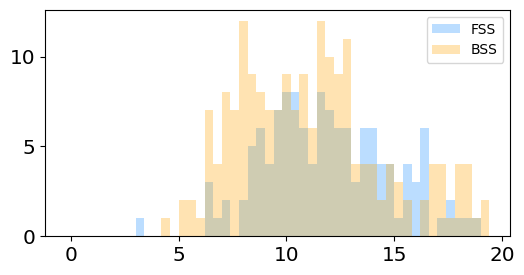

In [56]:
lim = [ 0, 20]
Nbins = 0.4
col = 'R_e_G [arcsec]'
output = 'figures/R_e-candidatas.jpg'

fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (6, 3), dpi = 100 ) 

kwargs = dict ( alpha = 0.3, edgecolor = None )
#for tabla, label, color in zip([ Fornax, Background, candidates ], [ 'FSS', 'BSS', 'RFS' ], [ 'dodgerblue', 'orange', 'deeppink' ]):
for tabla, label, color in zip([ Fornax, candidates ], [ 'FSS', 'BSS' ], [ 'dodgerblue', 'orange' ]):   
    data = tabla [col]

    frq, edges, density = calcula_histograma ( data, Nbins, lim = lim, density = False )
    ax0.bar ( edges[:-1], frq, width = Nbins, color = color, label = label, zorder = 2, **kwargs )
    #ax0.plot ( edges[:-1], density(edges[:-1]), color = color, zorder = 1 )
plt.legend()
plt.savefig ( output, dpi = 550, facecolor = 'w', edgecolor = 'w',
              orientation = 'portrait', format = None, transparent = False, 
              bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

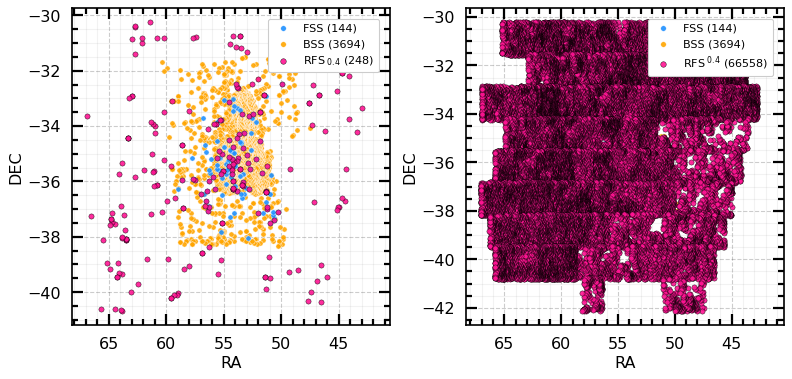

In [45]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
fig, ( (ax0, ax1) ) = plt.subplots ( ncols = 2, nrows = 1, figsize = (10, 6), dpi = 80 )

x = 'RA'; y = 'DEC'
for a in [ ax0, ax1 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
    
A = 0.40
d = Splus_proyecciones[Splus_proyecciones['Distance Fornax center percent'] < A]
ax0.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
             linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 4 )
d = Splus_proyecciones[Splus_proyecciones['Distance Fornax center percent'] > A]
ax1.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
             linewidth = 0.4, label = 'RFS$^{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 4 )

for a in [ ax0, ax1 ]:
    #a.set_ylim (-2, 5)
    custom_axes ( a )
    a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

    a.invert_xaxis()
    a.set_xlabel ( "RA" )
    a.set_ylabel ( "DEC" )

for a in [ ax0, ax1 ]:
    handles, labels = a.get_legend_handles_labels()
    if (a == ax0):
        loc = 'upper right'

    lgd = a.legend ( handles, labels, framealpha = 1, loc = loc, ncol = 1, borderaxespad = 1. )
    for legend_handle in lgd.legendHandles:
        legend_handle.set_sizes([100])
    
plt.tight_layout()
plt.savefig ( "figures/Paper-RADEC-DistancePercent2.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

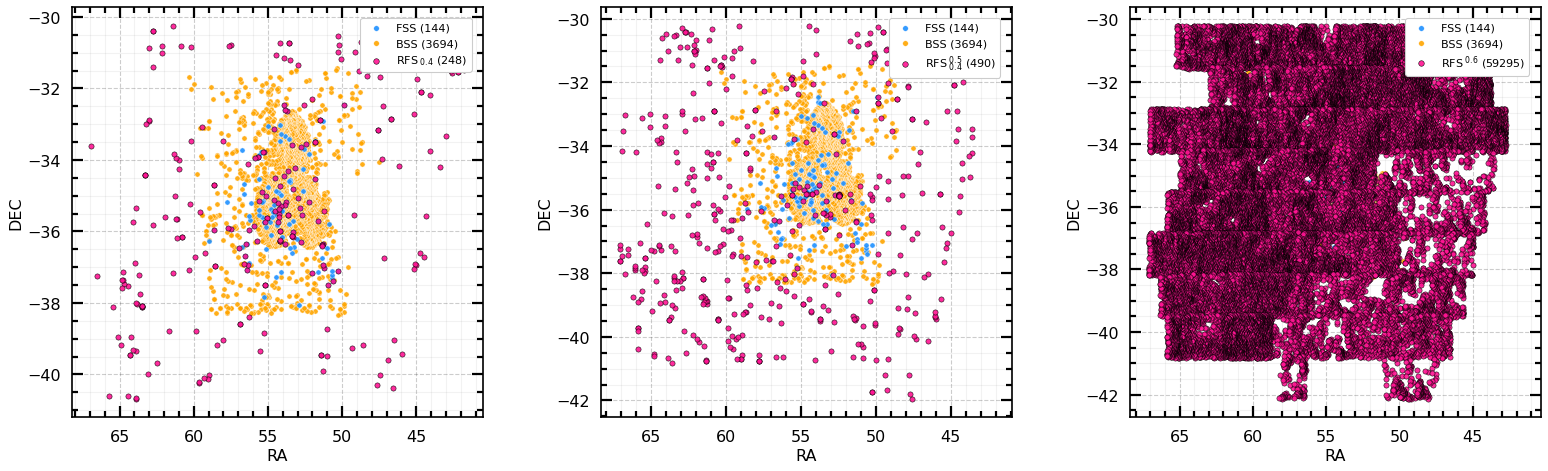

In [46]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
#fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )
fig, ( (ax0, ax1, ax2) ) = plt.subplots ( ncols = 3, nrows = 1, figsize = (20, 6), dpi = 80 )

x = 'RA'; y = 'DEC'
for a in [ ax0, ax1, ax2 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
d = Splus_proyecciones[Splus_proyecciones['Distance Fornax center percent'] < 0.4]
ax0.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
             linewidth = 0.5, label = 'RFS$_{~%s}$ (%i)' % (0.4, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 4 )
d = Splus_proyecciones[(Splus_proyecciones['Distance Fornax center percent'] > 0.4) & (Splus_proyecciones['Distance Fornax center percent'] < 0.5)]
ax1.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
             linewidth = 0.5, label = 'RFS$_{~%s}^{~%s}$ (%i)' % (0.4, 0.5, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 4 )
d = Splus_proyecciones[Splus_proyecciones['Distance Fornax center percent'] > 0.6]
ax2.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
             linewidth = 0.5, label = 'RFS$^{~%s}$ (%i)' % (0.6, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 4 )

for a in [ ax0, ax1, ax2 ]:
    #a.set_ylim (-2, 5)
    custom_axes ( a )
    a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

    a.invert_xaxis()
    a.set_xlabel ( "RA" )
    a.set_ylabel ( "DEC" )

for a in [ ax0, ax1, ax2 ]:
    handles, labels = a.get_legend_handles_labels()
    if (a == ax0):
        loc = 'upper right'

    lgd = a.legend ( handles, labels, framealpha = 1, loc = loc, ncol = 1, borderaxespad = 1. )
    for legend_handle in lgd.legendHandles:
        legend_handle.set_sizes([100])
    
plt.tight_layout()
#plt.savefig ( "figures/Paper-CMR.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
#            orientation = 'portrait', format = None, transparent = False, 
#            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

In [78]:
Splus_proyecciones[Splus_proyecciones['Distance Fornax center percent'] < 0.4][['ID', 'RA', 'DEC']].to_csv('tablas/Splus-Dist_less_04.csv', index = False)

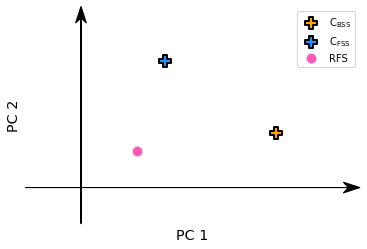

In [108]:
def arrowed_spines(fig, ax):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)


# plot
size = 150
#for c, label, color in zip([ 'Splus', 'Background' ], [ 'RFS', 'BSS' ], [ 'deeppink', 'orange' ]):
for c, label, color in zip([ [7,3], [3,7] ], [ 'BSS', 'FSS' ], [ 'orange', 'dodgerblue' ]):
    plt.scatter ( c[0] , c[1], label = "C$_{\mathrm{%s}}$" %(label), s = size*1.0, alpha = 1.0, edgecolors = 'black', 
               color = color, marker = 'P', linewidth = 2, zorder = 3 )

label = 'RFS'; color = 'deeppink'
plt.scatter ( 2, 2, label = label, s = size*0.8, alpha = 0.7, edgecolors = 'white', color = color, marker = 'o', linewidth = 1.5, zorder = 2 )

plt.xlim(-2, 10)
plt.ylim(-2, 10)
plt.xlabel ( "PC 1" )
plt.ylabel ( "PC 2" )
    
fig = plt.gcf()
fig.set_facecolor('white') 
ax = plt.gca()
plt.legend()
arrowed_spines(fig, ax)

plt.savefig ( "figures/Paper-SCHEME.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

In [97]:
s1 = df [[ "PC" + str(j+1) + " (" + l + " trained)" for j in range(len(prop_components[i])) ]].T[7775].squeeze()
s2 = df [[ "PC" + str(j+1) + " (" + l + " trained)" for j in range(len(prop_components[i])) ]].mean().squeeze() 
np.linalg.norm(s1-s2)


6.316121525357708

In [107]:
[ np.linalg.norm(df [[ "PC" + str(j+1) + " (" + l + " trained)" for j in range(len(prop_components[i])) ]].T[h].squeeze()-s2) for h in df.T.columns ]

[6.316121525357708,
 11.939360310131812,
 6.620135909222431,
 9.008511573616769,
 11.13220417847339,
 6.152313832462147,
 6.329459308132429,
 8.176271022993683,
 7.412541014428767,
 11.187520704209462,
 10.044896496248567,
 16.287049206382154,
 6.377381331394732,
 9.005063720808206,
 5.739496875582968,
 10.331278720766518,
 6.1598189915214,
 5.7069971631346545,
 5.201027352009142,
 9.331741058849035,
 15.875155432092226,
 10.519703944623652,
 8.723939362324161,
 5.240241467959309,
 6.951131672742783,
 5.335787433937266,
 9.19538869899801,
 16.511960427740295,
 10.193249283098398,
 20.559207991616162,
 10.572082278615214,
 12.174043992559659,
 6.580319228354926,
 7.584009339593257,
 15.97932282128076,
 6.968924705862225,
 17.894218887103786,
 9.2583933272587,
 8.329254646841367,
 3.893449492284501,
 21.60866186044493,
 12.064320579472696,
 9.825111169870935,
 12.40189916448281,
 7.208563299557885,
 7.881637118941875,
 14.440466522070274,
 15.547374845927129,
 3.6230808565627184,
 13.756

In [108]:
df

ID         RA        DEC  R_t_G [arcsec]  \
7775  b'Fornax.SPLUS-s25s32.001464'  50.170396 -32.874058       12.232933   
7776  b'Fornax.SPLUS-s25s32.003708'  49.663887 -32.749880        8.547957   
7777  b'Fornax.SPLUS-s25s32.003713'  49.837055 -32.760755       13.405643   
7778  b'Fornax.SPLUS-s25s32.003875'  49.849341 -32.746099       10.123428   
7779  b'Fornax.SPLUS-s25s32.005647'  49.305154 -32.575586       52.680535   
...                             ...        ...        ...             ...   
9123  b'Fornax.SPLUS-s29s35.022849'  57.413788 -37.419142       10.453153   
9124  b'Fornax.SPLUS-s29s35.023785'  57.684772 -37.375827       13.804540   
9125  b'Fornax.SPLUS-s29s35.024680'  57.853703 -37.339813       10.114354   
9126  b'Fornax.SPLUS-s29s35.030007'  57.842876 -37.127926       11.511682   
9127  b'Fornax.SPLUS-s29s35.032657'  58.124788 -37.016453       14.106805   

      R_e_G [arcsec]   <mu_e_G>    A_IMAGE    B_IMAGE  ELONGATION  \
7775        7.442728  22.658171   7.166149   6.043591    1.185743   
7776        6.704861  23.792707   3.932788   3.770407    1.043067   
7777        7.537974  22.267345   8.402363   7.820612    1.074387   
7778        7.001614  22.517905   7.369256   5.352850    1.376698   
7779       27.706139  22.138389  43.616783  30.444351    1.432673   
...              ...        ...        ...        ...         ...   
9123        7.961767  23.596951   5.403997   4.010218    1.347557   
9124        8.759368  23.542163   8.237505   6.067126    1.357728   
9125        8.208612  23.615761   5.278001   5.103095    1.034275   
9126        8.601647  23.348256   8.497507   4.897779    1.734971   
9127        8.587655  23.307164   9.341335   6.176400    1.512424   

      ELLIPTICITY  ...  PC79 (Background+Fornax trained)  \
7775     0.156647  ...                      1.166147e-16   
7776     0.041289  ...                     -5.053245e-16   
7777     0.069237  ...                      1.076329e-16   
7778     0.273624  ...                      2.851895e-16   
7779     0.302004  ...                     -1.654009e-15   
...           ...  ...                               ...   
9123     0.257916  ...                     -5.388969e-17   
9124     0.263475  ...                      1.427569e-17   
9125     0.033139  ...                      4.322345e-16   
9126     0.423622  ...                      2.739944e-16   
9127     0.338810  ...                      1.901552e-16   

      PC80 (Background+Fornax trained)  PC81 (Background+Fornax trained)  \
7775                      3.360329e-16                      3.554222e-16   
7776                      4.395207e-16                      1.440490e-15   
7777                      4.564039e-16                      5.149294e-16   
7778                      3.997811e-16                      4.628417e-16   
7779                     -5.465089e-17                      2.714389e-16   
...                                ...                               ...   
9123                      1.619911e-16                      1.201882e-16   
9124                      2.895141e-16                      1.008359e-16   
9125                      4.788735e-16                      8.201366e-16   
9126                      3.195770e-16                      3.401813e-17   
9127                      2.925952e-16                     -6.958284e-17   

      PC82 (Background+Fornax trained)  PC83 (Background+Fornax trained)  \
7775                     -1.797327e-16                     -9.536444e-16   
7776                     -3.305631e-16                      4.000181e-16   
7777                     -8.723063e-17                     -1.226701e-15   
7778                      1.205845e-16                     -1.139415e-15   
7779                     -4.893274e-16                     -1.893132e-15   
...                                ...                               ...   
9123                      8.686761e-18                     -5.032550e-16   
9124                      1.218934e-1

In [99]:
s2

PC1 (Fornax trained)    -6.813571e-01
PC2 (Fornax trained)     4.772232e+00
PC3 (Fornax trained)     2.244066e+00
PC4 (Fornax trained)    -2.129326e+00
PC5 (Fornax trained)    -1.720755e+00
                             ...     
PC84 (Fornax trained)    2.337591e-17
PC85 (Fornax trained)    9.298890e-17
PC86 (Fornax trained)    1.609573e-16
PC87 (Fornax trained)   -2.012538e-16
PC88 (Fornax trained)    5.717025e-17
Length: 88, dtype: float64

In [246]:
dd['z'] = [ df.loc[jota]['z'] for jota in dd['j'] ]

In [247]:
dd#[dd['i']==7777]

i     j      dist         z
1       7775  7777  0.503505  0.043393
2       7775  7778  0.077450  0.043000
5       7775  7781  0.357247  0.064818
6       7775  7782  0.557558  0.046499
8       7775  7784  0.323426  0.067707
...      ...   ...       ...       ...
914622  9124  9125  0.796787  0.055612
914623  9124  9126  0.353012  0.074795
914624  9124  9127  0.399917  0.074375
914625  9125  9126  0.954414  0.074795
914627  9126  9127  0.087248  0.074375

[226092 rows x 4 columns]

In [236]:
dd[dd['i']==7781]

i     j      dist
8099  7781  7784  0.956407
8102  7781  7787  0.767033
8105  7781  7790  0.863706
8182  7781  7867  0.608957
8185  7781  7870  0.812534
8191  7781  7876  0.797646
8192  7781  7877  0.948734
8284  7781  7969  0.673384
8383  7781  8068  0.715427
8473  7781  8158  0.875424
8513  7781  8198  0.868925
8521  7781  8206  0.719954
8556  7781  8241  0.838810
8641  7781  8326  0.896206
8865  7781  8550  0.972983
8990  7781  8675  0.964814
9111  7781  8796  0.661885
9298  7781  8983  0.920251
9303  7781  8988  0.791671
9310  7781  8995  0.520458
9343  7781  9028  0.529431
9344  7781  9029  0.929921
9359  7781  9044  0.913841
9371  7781  9056  0.451418
9382  7781  9067  0.811581

ValueError: x and y must be the same size

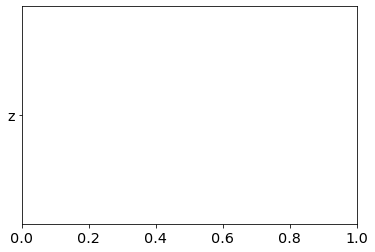

In [241]:
plt.scatter ('dist', 'z', data=ddd)

In [15]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

In [49]:
l_train = 'Fornax'
x = 'PC1 (' + l_train + ' trained)'
y = 'PC2 (' + l_train + ' trained)'


#df = proyecciones[ proyecciones['label'] == 'Background'][[x,y]] 
df = proyecciones[ proyecciones['label'] == 'Background'][[ 'PC' + str(i) + ' (' + l_train + ' trained)' for i in np.arange(1,9) ]]

X_scaled = scale(df)
#modelo_kmeans = KMeans(n_clusters=6, n_init=25, random_state=123)
modelo_kmeans = KMeans ( init = "random", #n_clusters = 6, 
                        n_init = 500, max_iter = 500, random_state = 42 )
    
modelo_kmeans.fit(X=X_scaled)

# Clasificación con el modelo kmeans
# ==============================================================================
y_predict = modelo_kmeans.predict(X=X_scaled)

In [45]:
y = [ 'PC' + str(i) + ' (' + l_train + ' trained)' for i in np.arange(1,9) ]
y

['PC1 (Fornax trained)',
 'PC2 (Fornax trained)',
 'PC3 (Fornax trained)',
 'PC4 (Fornax trained)',
 'PC5 (Fornax trained)',
 'PC6 (Fornax trained)',
 'PC7 (Fornax trained)',
 'PC8 (Fornax trained)']

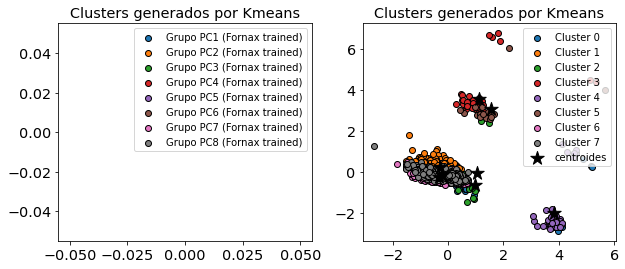

In [46]:
# Representación gráfica: grupos originales vs clusters creados
# ==============================================================================
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1], 
        #c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
    
ax[0].set_title('Clusters generados por Kmeans')
ax[0].legend();

for i in np.unique(y_predict):
    ax[1].scatter(
        x = X_scaled[y_predict == i, 0],
        y = X_scaled[y_predict == i, 1], 
        #c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Cluster {i}"
    )
    
ax[1].scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1], 
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend();

In [50]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score


In [83]:
#l_train = 'Fornax'
#x = 'PC1 (' + l_train + ' trained)'
#y = 'PC2 (' + l_train + ' trained)'

#df = proyecciones[ proyecciones['label'] == 'Background'][[x,y]] 
df = proyecciones[ proyecciones['label'] == 'Background'][[ 'PC' + str(i) + ' (' + l_train + ' trained)' for i in np.arange(1,9) ]]

# Escalado de datos
# ==============================================================================
X = df.to_numpy()
X_scaled = scale(X)

In [84]:
# Modelo
# ==============================================================================
modelo_dbscan = DBSCAN(
                    eps          = 0.2,
                    min_samples  = 6,
                    metric       = 'euclidean',
                )

modelo_dbscan.fit(X=X_scaled)

DBSCAN(eps=0.2, min_samples=6)

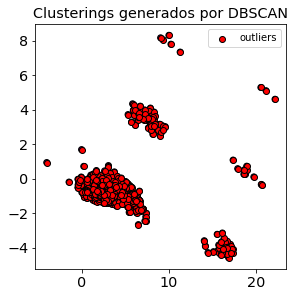

In [85]:
# Clasificación
# ==============================================================================
labels = modelo_dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))

ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = labels,
    marker    = 'o',
    edgecolor = 'black'
)

# Los outliers se identifican con el label -1
ax.scatter(
    x = X[labels == -1, 0],
    y = X[labels == -1, 1], 
    c = 'red',
    marker    = 'o',
    edgecolor = 'black',
    label = 'outliers'
)

ax.legend()
ax.set_title('Clusterings generados por DBSCAN');

In [82]:
# Número de clusters y observaciones "outliers"
# ==============================================================================
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise    = labels.tolist().count(-1)

print(f'Número de clusters encontrados: {n_clusters}')
print(f'Número de outliers encontrados: {n_noise}')

Número de clusters encontrados: 3
Número de outliers encontrados: 44


In [81]:
labels.tolist().count(-1)

44

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
fig = px.scatter_matrix(
    components,
    #labels=labels,
    #dimensions=range(5),
    color=datos["label"]
)
fig.update_layout(autosize=False, width=1000, height=1000, showlegend=True, margin={"l":0,"r":0,"t":0,"b":0})

fig.update_traces(diagonal_visible=False)
fig.show()

In [271]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import networkx as nx
import scipy.spatial as sp

def cluster(data, epsilon,N): #DBSCAN, euclidean distance
    db     = DBSCAN(eps=epsilon, min_samples=N).fit(data)
    labels = db.labels_ #labels of the found clusters
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0) #number of clusters
    clusters   = [data[labels == i] for i in range(n_clusters)] #list of clusters
    return clusters, n_clusters

centers = [[1, 1,1], [-1, -1,1], [1, -1,1]]
N=200
epsilon = 0.1
X,_ = make_blobs(n_samples=N, centers=centers, cluster_std=0.4,
                            random_state=0)
cluster(X,epsilon,N)

([], 0)

3 A_IMAGE -15.0 13.86047429064459
4 B_IMAGE -15.0 5.263859157185678
0 R_t_G [arcsec] -15.0 -16.40913150756368
3 A_IMAGE -15.0 -7.285883455219421
7 THETA_IMAGE2 -15.0 0.994455979807213
8 U_auto -15.0 -17.051304788146027
10 F395_auto -15.0 -4.199444674695436
12 F430_auto -15.0 -6.9505070846889305


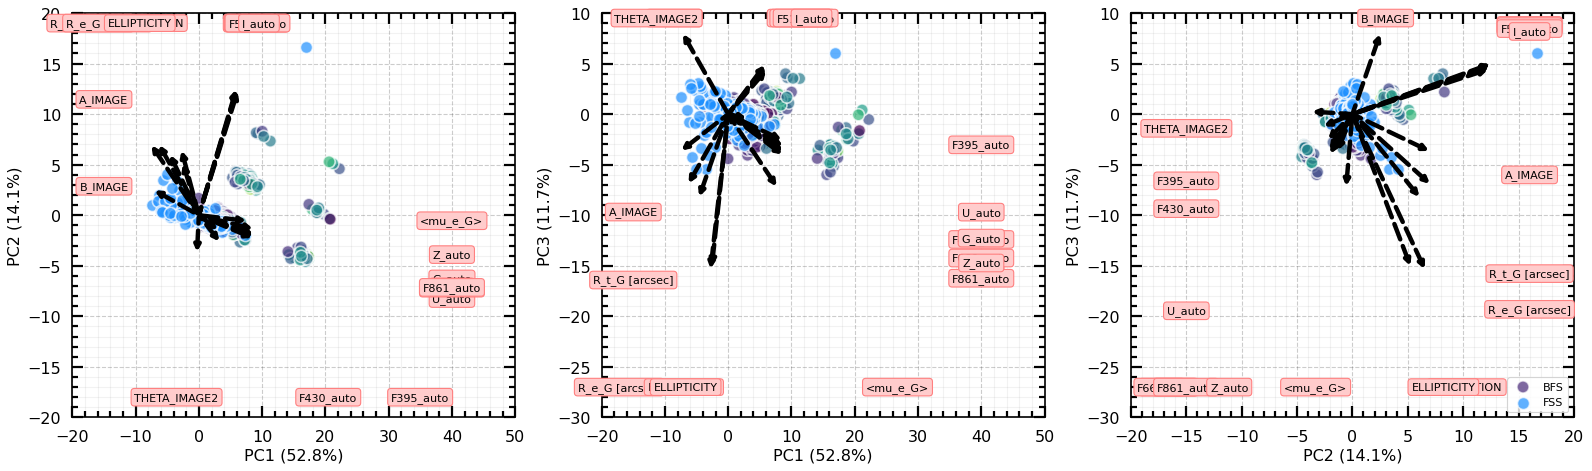

In [158]:
size = 150 # Tamaño por defecto para las fuentes de los graficos
fig, ( (ax0, ax1, ax2) ) = plt.subplots ( ncols = 3, nrows = 1, figsize = (20, 6), dpi = 80 )

l_train = 'Fornax'; PC1min = -20; PC1max = 50;  PC2min = -20; PC2max = 20;  PC3min = -30; PC3max = 10 
for PC in zip( [['PC1', 'PC2'], ['PC1', 'PC3'], ['PC2', 'PC3']], [[0, 1], [ 0, 2], [ 1, 2]], [[ ax0 ], [ ax1 ], [ ax2 ]], [[PC1min, PC1max, PC2min, PC2max], [PC1min, PC1max, PC3min, PC3max], [PC2min, PC2max, PC3min, PC3max]] ):
    a = PC[2][0]; x = PC[0][0] + ' (' + l_train + ' trained)'; y = PC[0][1] + ' (' + l_train + ' trained)'
    a.set_xlim ( PC[3][0], PC[3][1] ); a.set_ylim ( PC[3][2], PC[3][3] )  
    
    #for c, color in zip([ 'Splus', 'Fornax' ], [ 'mediumslateblue', 'red']):
    for c, label, color in zip([ 'Background', 'Fornax' ], [ 'BFS', 'FSS' ], [ 'orange', 'dodgerblue' ]):
        df = proyecciones[ proyecciones['label'] == c ]; 
        if c == 'Background': 
            a.scatter ( x, y, data = df, label = label, s = size*0.8, alpha = 0.7, edgecolors = 'white', c = 'z', marker = 'o', linewidth = 1.5, zorder = 2 )
        else:
            a.scatter ( x, y, data = df, label = label, s = size*0.8, alpha = 0.7, edgecolors = 'white', color = color, marker = 'o', linewidth = 1.5, zorder = 2 )

    biplot ( coeff, x, y, features, scale = 30, arrow_size = 0.11, linewidth = 4, ax = a )
    
    custom_axes ( a )
    a.set_xlabel ( xy_labels(l_train)[PC[1][0]] )
    a.set_ylabel ( xy_labels(l_train)[PC[1][1]] )
    if a == ax2: a.legend ( loc = 'lower right' )
    #a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

plt.tight_layout()
plt.savefig ( "figures/PCA-all-BACKGROUND-Fornax_trained.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

2 <mu_e_G> -30.0 4.871605604105745
14 G_auto -30.0 3.1415876023713527
15 F515_auto -30.0 6.34982743216197
16 R_auto -30.0 4.291450745038875
17 F660_auto -30.0 4.559152023725089
18 I_auto -30.0 4.87756995388888
19 F861_auto -30.0 2.3237132754820338
20 Z_auto -30.0 5.035997931917497
2 <mu_e_G> -30.0 12.90209384161356
14 G_auto -30.0 2.6051807229843718
15 F515_auto -30.0 13.691697828191382
16 R_auto -30.0 0.5060194426096255
17 F660_auto -30.0 1.6732321163590511
18 I_auto -30.0 -0.4685706905464104
19 F861_auto -30.0 0.4671873940113781
20 Z_auto -30.0 -1.3807396859596939
4 B_IMAGE -3.75 3.16538880943416


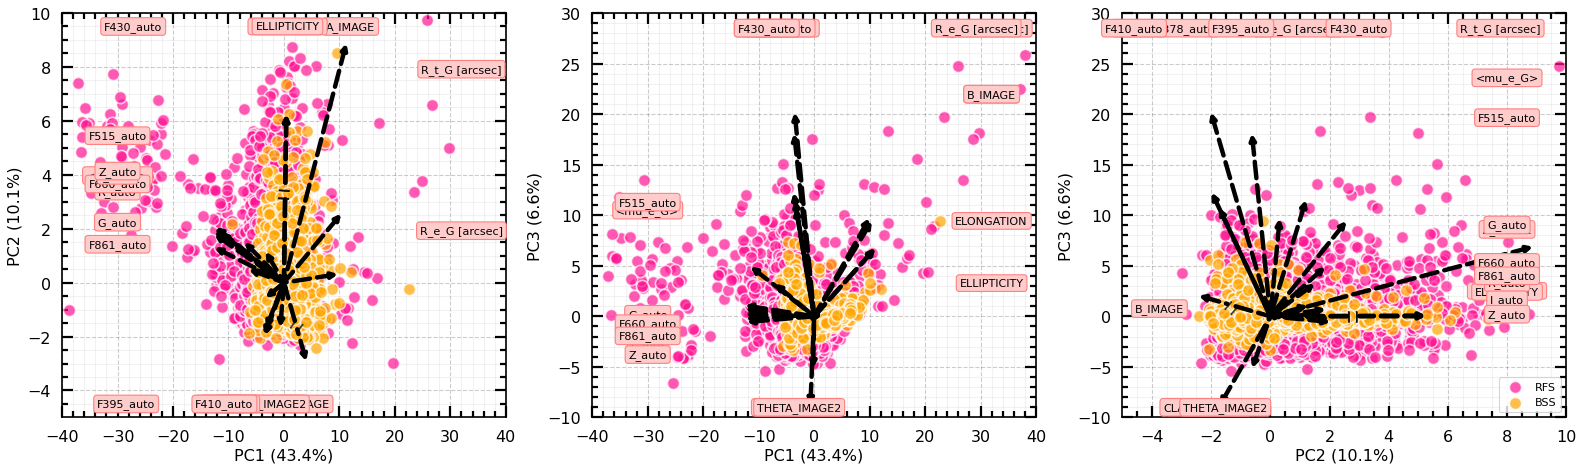

In [48]:
size = 150 # Tamaño por defecto para las fuentes de los graficos
fig, ( (ax0, ax1, ax2) ) = plt.subplots ( ncols = 3, nrows = 1, figsize = (20, 6), dpi = 80 )

l_train = 'Background'; PC1min = -40; PC1max = 40;  PC2min = -5; PC2max = 10;  PC3min = -10; PC3max = 30 
for PC in zip( [['PC1', 'PC2'], ['PC1', 'PC3'], ['PC2', 'PC3']], [[0, 1], [ 0, 2], [ 1, 2]] , [[ ax0 ], [ ax1 ], [ ax2 ]], [[PC1min, PC1max, PC2min, PC2max], [PC1min, PC1max, PC3min, PC3max], [PC2min, PC2max, PC3min, PC3max]] ):
    a = PC[2][0]; x = PC[0][0] + ' (' + l_train + ' trained)'; y = PC[0][1] + ' (' + l_train + ' trained)'
    a.set_xlim ( PC[3][0], PC[3][1] ); a.set_ylim ( PC[3][2], PC[3][3] )  
    #for c, color in zip([ 'Splus', 'Background' ], [ 'mediumslateblue', 'green']):
    for c, label, color in zip([ 'Splus', 'Background' ], [ 'RFS', 'BSS' ], [ 'deeppink', 'orange' ]):
        df = proyecciones[ proyecciones['label'] == c ]; 
        a.scatter ( x, y, data = df, label = label, s = size*0.8, alpha = 0.7, edgecolors = 'white', color = color, marker = 'o', linewidth = 1.5, zorder = 2 )
    biplot ( coeff, x, y, features, scale = 40, arrow_size = 0.09, linewidth = 4, ax = a )
    
    custom_axes ( a )
    a.set_xlabel ( xy_labels(l_train)[PC[1][0]] )
    a.set_ylabel ( xy_labels(l_train)[PC[1][1]] )
    if a == ax2: a.legend ( loc = 'lower right' )
    #a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

plt.tight_layout()
plt.savefig ( "figures/PCA-all-SPLUS-BACKGROUND_trained.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

In [32]:
def biplot ( l_train, coeff, labels, scale = 1, colors = None, visible = None, ax = plt, arrow_size = 0.5 ):
    if l_train == 'Background+Fornax':
        train = datos [ (datos['label'] == 'Fornax') | (datos['label'] == 'Background') ][features]
    else:
        train = datos [ datos['label'] == l_train ][features]

    # Entrenamiento modelo PCA con escalado de los datos
    # ==============================================================================
    pca_pipe = make_pipeline(StandardScaler(), PCA())
    pca_pipe.fit ( train )

    # Se extrae el modelo entrenado del pipeline
    modelo_pca = pca_pipe.named_steps['pca']

    #
    components = pca_pipe.fit_transform ( datos[features] )    
    
    for i, label in enumerate(labels):
        if visible is None or visible[i]:
            ax.arrow(
                0,
                0,
                coeff[i, 0] * scale,
                coeff[i, 1] * scale,
                head_width=arrow_size * scale,
                head_length=arrow_size * scale,
                color="#000" if colors is None else colors[i], zorder = 9
            )
            ax.text(
                coeff[i, 0] * 1.15 * scale,
                coeff[i, 1] * 1.15 * scale,
                label,
                color="#000" if colors is None else colors[i],
                ha="center",
                va="center",
            )

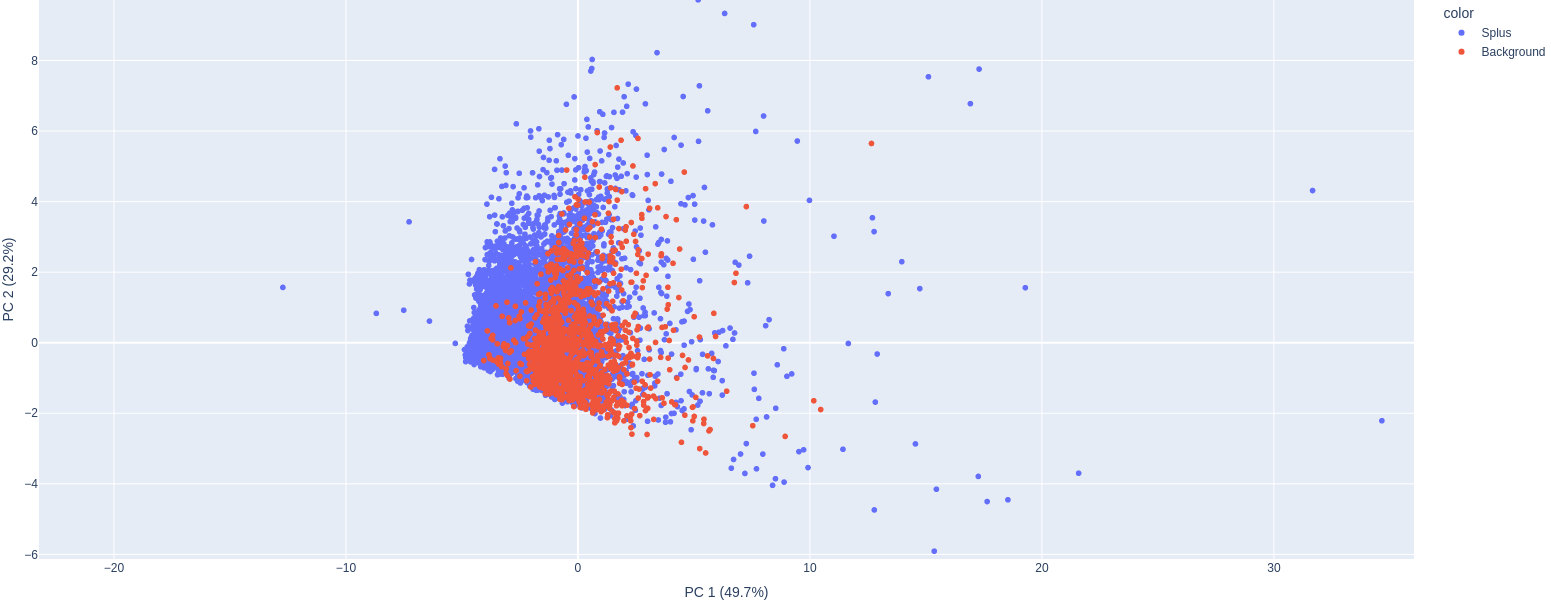

In [125]:
l_train = 'Background'
train = datos [ datos['label'] == l_train ][features]

# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit ( train )

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
    
d = datos[ (datos['label'] == 'Background') | (datos['label'] == 'Splus') ]
d.sort_values ( by = 'label', key = lambda x: x.map({'Fornax': 0, 'Splus': 1, 'Background': 3} ), inplace = True )
#
components = pca_pipe.transform ( d[features] )

labels = [ f"PC {i+1} ({var:.1f}%)" for i, var in enumerate(modelo_pca.explained_variance_ratio_ * 100) ]

fig = px.scatter ( x = components[:,0], y = components[:,1], color = d['label'] )
fig.update_layout ( xaxis_title = labels[0], yaxis_title = labels[1], autosize = False, 
                   width = 600, height = 600, showlegend = True, margin = {"l":0,"r":0,"t":0,"b":0} )

fig.write_html("figures/PCA-param-02-Splus_Background.html")
fig.write_image("figures/PCA-param-02-Splus_Background.jpeg")
fig.show()

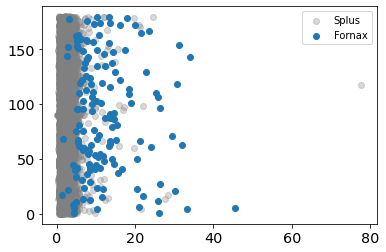

In [110]:
plt.scatter (Splus['B_IMAGE'], Splus['THETA_IMAGE2'], color="gray", alpha=0.3, label = "Splus")
#plt.scatter (Background['B_IMAGE'], Background['THETA_IMAGE2'], alpha = 0.1, label="BACK")
plt.scatter (Fornax['B_IMAGE'], Fornax['THETA_IMAGE2'], label = "Fornax")
plt.legend()

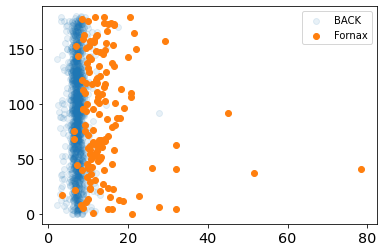

In [115]:
#plt.scatter (Splus['R_t_G [arcsec]'], Splus['THETA_IMAGE2'], color="gray", alpha=0.3, label = "Splus")
plt.scatter (Background['R_e_G [arcsec]'], Background['THETA_IMAGE2'], alpha = 0.1, label="BACK")
plt.scatter (Fornax['R_e_G [arcsec]'], Fornax['THETA_IMAGE2'], label = "Fornax")
plt.legend()

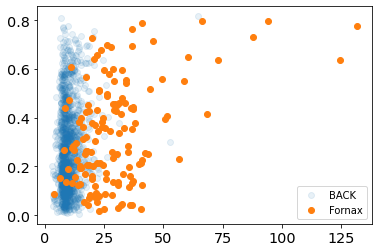

In [118]:
#plt.scatter (Splus['R_t_G [arcsec]'], Splus['THETA_IMAGE2'], color="gray", alpha=0.3, label = "Splus")
plt.scatter (Background['R_t_G [arcsec]'], Background['ELLIPTICITY'], alpha = 0.1, label="BACK")
plt.scatter (Fornax['R_t_G [arcsec]'], Fornax['ELLIPTICITY'], label = "Fornax")
plt.legend()

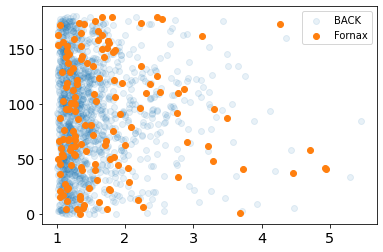

In [116]:
#plt.scatter (Splus['ELONGATION'], Splus['THETA_IMAGE2'], color="gray", alpha=0.3, label = "Splus")
plt.scatter (Background['ELONGATION'], Background['THETA_IMAGE2'], alpha = 0.1, label="BACK")
plt.scatter (Fornax['ELONGATION'], Fornax['THETA_IMAGE2'], label = "Fornax")
plt.legend()

In [112]:
R_t_G [arcsec]

1353